# Exploratory Data Analysis (EDA) - Bank Loan Applications (Risk Analytics)

## Table Of Conents
### 1. Importing Libraries
   ##### 1.1 Data Analysis Libriaries
   ##### 1.2 Data Visualization Libraries
   ##### 1.3. Suppress Warnings
### 2. Importing the Datasets
### 3. Applications Data
   ##### 3.1 Data Understanding
   ##### 3.2 Handling Missing Values
   ##### 3.3 Merging Columns
   ##### 3.4 Data Alteration
   ##### 3.5 Outliers Check
   ##### 3.6 Data Imbalance Check
   ##### 3.7 Univariate Analysis
   ##### 3.8 Bivariate & Multivariate Analysis
   ##### 3.9 Top 10 Correlations
### 4. Previous Applications Data
   ##### 4.1 Data Understanding
   ##### 4.2 Handling Missing Values & Data Sanity Check
   ##### 4.3 Univariate & Multivariate Analysis
### 5. Merged Data
   ##### 5.1 Data Merging
   ##### 5.2 Univariate & Multivariate Analysis
### 6. Conclusion
   ##### 6.1 Decesive Factors & Suggestions

## 1. Importing the Libraries

In [1]:
# Analysis
import pandas as pd, numpy as np

# Visualization
import matplotlib.pyplot as plt, seaborn as sns

# Warnings (Ignoring)
import warnings
warnings.filterwarnings('ignore')

# View settings
pd.set_option('display.max_columns', None)

## 2. Importing the Datasets

In [2]:
apls=pd.read_csv('application_data.csv')   # Loan Applications Data
pre_apls=pd.read_csv('previous_application.csv')   # Previous Loan Applications Data

## 3. Applications Data

### 3.1 Data Understanding

In [3]:
# Viewing the data
apls.head(50)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0000,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

#### Data Shape

In [4]:
apls.shape

(307511, 122)

#### Data Information

In [5]:
# Checking the datatypes of all the columns ------------------Check this
apls.info(verbose = True) # All columns are in the correct format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

#### Continous Columns Information

In [6]:
apls.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

### 3.2 Handling Missing Values & Data Sanity Check

#### Check for Missing Values

In [7]:
apls.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

#### % of Missing Values in all the Columns

In [8]:
(apls.isna().mean()*100).sort_values(ascending = False).head(50)

COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
COMMONAREA_MEDI                 69.872297
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_MEDI                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MODE                   59.376738
BASEMENTAREA_MODE               58.515956
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
EXT_SOURCE_1                    56

#### Dropping Columns with Null Values / Missing Values >40%

In [9]:
col_null_40_apls=apls.columns[apls.isna().mean()*100>40]
apls.drop(columns=col_null_40_apls, inplace=True) 
(apls.isna().mean()*100).sort_values(ascending = False).head(50)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
NAME_TYPE_SUITE                 0.420148
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
SK_ID_CURR                      0.000000
CNT_CHILDREN                    0.000000
FLAG_OWN_REALTY                 0.000000
FLAG_OWN_CAR                    0.000000
CODE_GENDER                     0.000000
NAME_CONTRACT_TYPE              0.000000
TARGET          

#### Imputing Null Values of 'OCCUPATION_TYPE' Column (31.34% are Null)

In [10]:
# 'OCCUPATION_TYPE': Categorical column, replacing with mode i.e 'Laborers'
print(apls['OCCUPATION_TYPE'].mode()[0])
apls['OCCUPATION_TYPE']=apls['OCCUPATION_TYPE'].fillna(apls['OCCUPATION_TYPE'].mode()[0])

Laborers


#### Imputing Null Values of 'AMT_ANNUITY' Column (0.0039% are Null)

In [11]:
# 'AMT_ANNUITY': Continous column, replacing with Median
print(apls['AMT_ANNUITY'].median())
apls['AMT_ANNUITY']=apls['AMT_ANNUITY'].fillna(apls['AMT_ANNUITY'].median())

24903.0


#### Imputing Null Values of 'AMT_GOODS_PRICE' Column (0.09% are Null)
- As it is the amount of the goods on which the loan is given, here the rate of 'AMT_CREDIT' that is assigned to the each 'AMT_GOODS_PRICE' is calculated and average is taken to fill the null values of 'AMT_GOODS_PRICE' column.

In [12]:
AMT_GOODS_PRICE_NAN=1-((apls['AMT_CREDIT']/apls['AMT_GOODS_PRICE'])-1).mean()
AMT_GOODS_PRICE_NAN*100

np.float64(87.70048282953486)

- Here the average 'AMT_CREDIT' is 12.3% more than the 'AMT_GOODS_PRICE'. Hence replacing null values of 'AMT_GOODS_PRICE' column with __87.7%__ of 'AMT_CREDIT'

In [13]:
apls['AMT_GOODS_PRICE']=apls['AMT_GOODS_PRICE'].fillna(apls['AMT_CREDIT']*AMT_GOODS_PRICE_NAN)

#### Imputing Null Values of 'NAME_TYPE_SUITE' Column (0.42% are Null)

In [14]:
# 'NAME_TYPE_SUITE': Categorical column, replacing with mode i.e 'Unaccompanied'
apls['NAME_TYPE_SUITE'].mode()[0]
apls['NAME_TYPE_SUITE']=apls['NAME_TYPE_SUITE'].fillna(apls['NAME_TYPE_SUITE'].mode()[0])

#### Imputing Null Values of other Continous Columns

In [15]:
# Continous columns: replacing with Median
for i in ['CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']:
    apls[i]=apls[i].fillna(apls[i].median())
    
# Creating the 'TARGET_PERCENT' Column. Multiplying 'TARGET' column by 100.
apls['TARGET_PERCENT']=apls['TARGET'].apply(lambda x:100 if x==1 else 0)
apls1=apls.copy()

#### Final check for null values of all the columns

In [16]:
(apls.isna().mean()*100).sort_values(ascending = False).head(50)

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
AMT_ANNUITY                    0.0
AMT_GOODS_PRICE                0.0
NAME_TYPE_SUITE                0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_REGISTRATION              0.0
DAYS_ID_PUBLISH                0.0
FLAG_MOBIL                     0.0
FLAG_EMP_PHONE                 0.0
FLAG_WORK_PHONE                0.0
FLAG_CONT_MOBILE               0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
OCCUPATION_TYPE                0.0
CNT_FAM_MEMBERS     

#### Viewing the Data

In [17]:
apls.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET_PERCENT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,100
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0


### 3.3 Merging Columns

#### Merging the Contact Info columns into 'NO_CONTACT_INFO'
- __Columns:-__ FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL

In [18]:
apls['NO_CONTACT_INFO']=apls[['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL']].sum(axis=1)
apls=apls.drop(columns=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL'])

#### Merging the two columns 'REGION_RATING_CLIENT' & 'REGION_RATING_CLIENT_W_CITY' and taking the Average Rating

In [19]:
apls['CLIENT_REGION_RATING']=apls[['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']].mean(axis=1)
apls=apls.drop(columns=['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY'])

#### Merging the columns of address matches into 'PERCENTAGE_ADDRESS_MATCH'
- __Columns:-__ 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY'

In [20]:
apls['PERCENTAGE_ADDRESS_MATCH']=(apls[['REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']].mean(axis=1))*100
apls['PERCENTAGE_ADDRESS_MATCH']=100-apls['PERCENTAGE_ADDRESS_MATCH']
apls=apls.drop(columns=['REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY'])

#### Merging the External Source columns ('EXT_SOURCE_2' & 'EXT_SOURCE_3') by taking the Average

In [21]:
apls['EXT_SOURCE']=apls[['EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
apls=apls.drop(columns=['EXT_SOURCE_2', 'EXT_SOURCE_3'])

#### Merging all the columns of Flag Documents (Adding the Total Documents Given)
- __Columns:-__ 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'

In [22]:
FLAG_DOCUMENTS=list(apls.columns)[31:51]
apls['TOTAL_DOC_GIVEN']=apls[FLAG_DOCUMENTS].sum(axis=1)
apls=apls.drop(columns=FLAG_DOCUMENTS)

### 3.4 Data Alteration

#### Converting the Age in Negative Days to Positive Years in 'DAYS_BIRTH' column

In [23]:
apls['AGE']=(round(apls['DAYS_BIRTH']/365))*-1
apls=apls.drop(columns=['DAYS_BIRTH'])

#### Converting the Negative Values of 'DAYS_REGISTRATION' to Positive

In [24]:
apls['DAYS_REGISTRATION']=apls['DAYS_REGISTRATION'].apply(lambda x:x*-1)

#### Converting the negative values of 'DAYS_LAST_PHONE_CHANGE' to Positive

In [25]:
apls['DAYS_LAST_PHONE_CHANGE']=apls['DAYS_LAST_PHONE_CHANGE'].apply(lambda x:x*-1)

#### Creating the column 'Repayer_or_Defaulter'
- 0 from TARGET column as Repayers & 1 from TARGET column as Defaulters

In [26]:
apls['Repayer_or_Defaulter']=apls['TARGET'].apply(lambda x:'Repayer' if x==0 else 'Defaulter')

### 3.5 Outliers Check

#### Plotting the Boxplots of all the Continous Columns

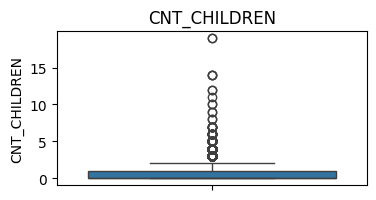

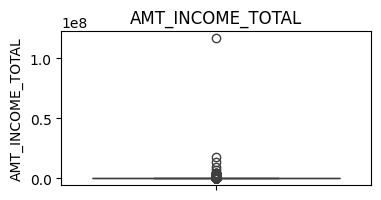

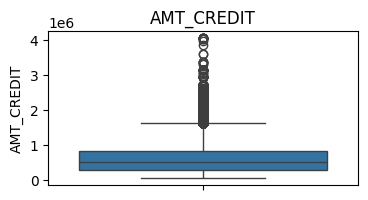

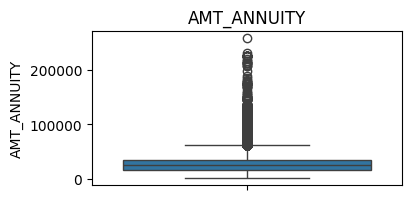

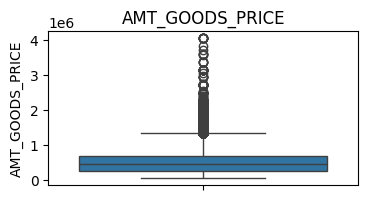

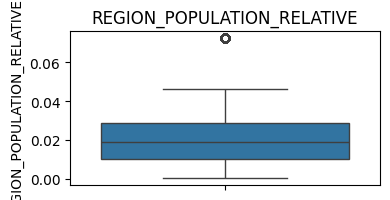

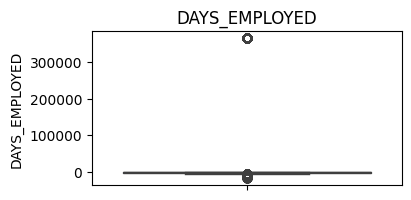

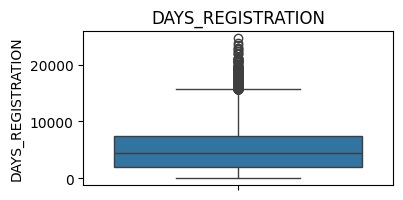

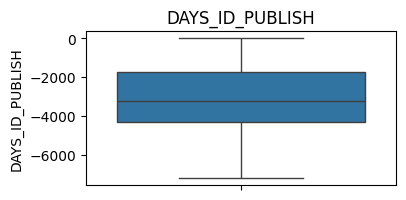

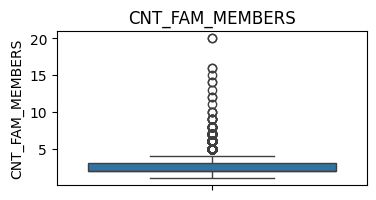

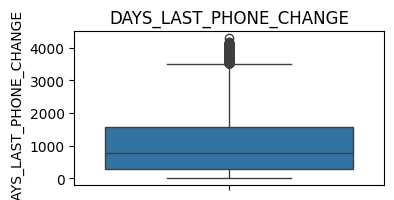

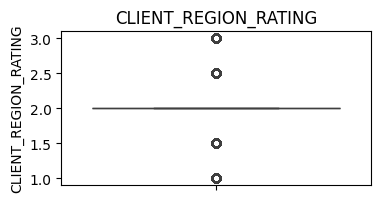

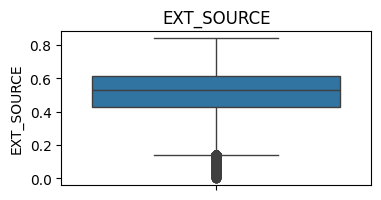

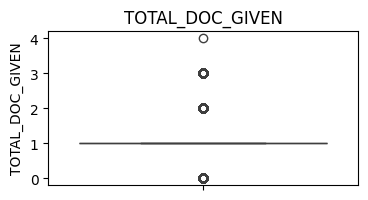

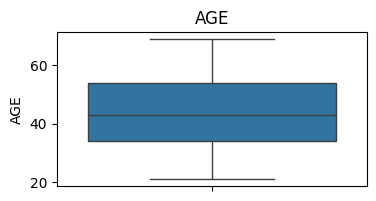

In [27]:
##Plotting the Outliers
apls_continuous = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE', 'CLIENT_REGION_RATING', 'EXT_SOURCE', 'TOTAL_DOC_GIVEN', 'AGE']
apls_categorical=['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'NO_CONTACT_INFO', 'PERCENTAGE_ADDRESS_MATCH']
j=1
for i in apls_continuous:
    plt.figure(figsize=(4,2))
    sns.boxplot(y=apls[i])
    plt.title(i)
    plt.show()

#### Insights:-
- CNT_CHILDREN:- Few applicants have more than 2-4 children which are outliers in this case
- AMT_INCOME_TOTAL:- Few applicants/clients are having very high income
- AMT_CREDIT:- Few applicants are asking for high loan credit (AMT_CREDIT) because of higher value of AMT_GOODS_PRICE
- AMT_ANNUITY:- As there are clients who are asking for high AMT_CREDIT, Amount of anual repayment also goes high
- AMT_GOODS_PRICE:- Few clients are applying for high goods price
- REGION_POPULATION_RELATIVE:- No much outliers
- DAYS_EMPLOYED:- Some outliers beyond 350000 days which can be considered as ERROR
- DAYS_REGISTRATION:- There are outliers which are still valid
- CNT_FAM_MEMBERS:- Few clients have family members more than 5
- DAYS_LAST_PHONE_CHANGE:- There are outliers which are still valid
- CLIENT_REGION_RATING:- Few of the clients have very good rating and very less rating at the same time. Not strong insight.
- EXT_SOURCE:- Few clients have very less normalized score from external source
- TOTAL_DOC_GIVEN:- Majority of the clients have given single document only. Few have given more than 1 or not given at all.
- AGE:- No outliers in AGE column

### 3.6 Data Imbalance Check
- Considering the 'TARGET' column

In [28]:
# Ratio of Repayers to Defaulters
di=(apls['Repayer_or_Defaulter'].value_counts(normalize=True)*100)
di[0]/di[1]

np.float64(11.387150050352469)

- Here 91.92% of the clients are Repayers and 8.07% of the clients are Defaulters
- Ratio of Repayers (0) to Defaulters (1) is __11.4:1__

#### Pie Chart for Data Imbalance

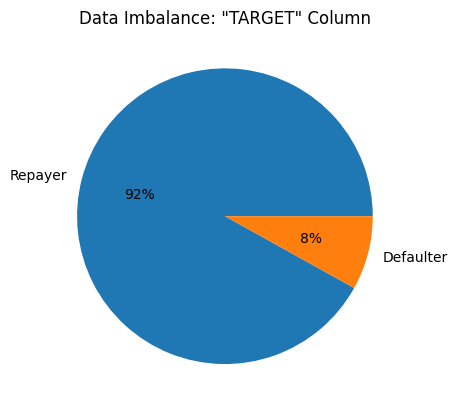

In [29]:
plt.pie(di, labels= di.index, autopct='%.0f%%')
plt.title('Data Imbalance: "TARGET" Column')
plt.show()

### 3.7 Univariate Analysis
- Target:- 'TARGET' column

#### Creating the Function to Plot the Univariate Categorical columns

In [30]:
def apls_univariate_categorical(x):
    chart1 = apls[x].value_counts().to_frame(name='Value_Counts')
    defaulters = apls.groupby(x)['TARGET'].sum()
    
    chart = pd.concat([chart1, defaulters], axis=1).rename(columns={'TARGET': 'Defaulters'})
    chart['Percentage_Defaulters'] = (chart['Defaulters'] / chart['Value_Counts']) * 100
    chart = chart[['Percentage_Defaulters']].reset_index().sort_values(by='Percentage_Defaulters', ascending=False)

    fig, axes = plt.subplots(2, 1, figsize=(5, 9), dpi=120)

    # Plot 1: Percentage of Defaulters
    sns.barplot(data=chart, x=x, y='Percentage_Defaulters', color='red', ax=axes[0])
    axes[0].set_title(f'% of Defaulters in each category ({x})', fontsize=11)

    # Plot 2: Countplot by Repayer/Defaulter
    sns.countplot(data=apls, x=x, hue='Repayer_or_Defaulter', palette=['Red', 'Green'], ax=axes[1])
    axes[1].set_title(x, fontsize=11)

    plt.tight_layout(h_pad=5)
    plt.show()

#### NAME_CONTRACT_TYPE

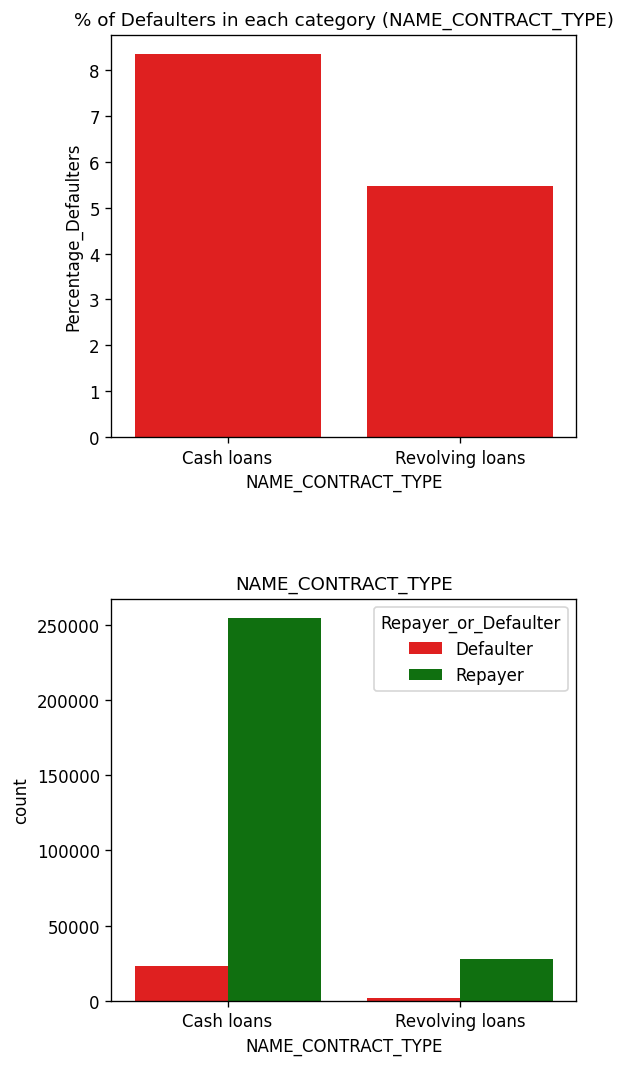

In [31]:
apls_univariate_categorical('NAME_CONTRACT_TYPE')

#### Insights:-
- More than 8% of the clients under cash loans are defaulters, whereas >5% of the clients under revolving loans are defaulters
- Less risk is associated with revolving loans type

#### CODE_GENDER

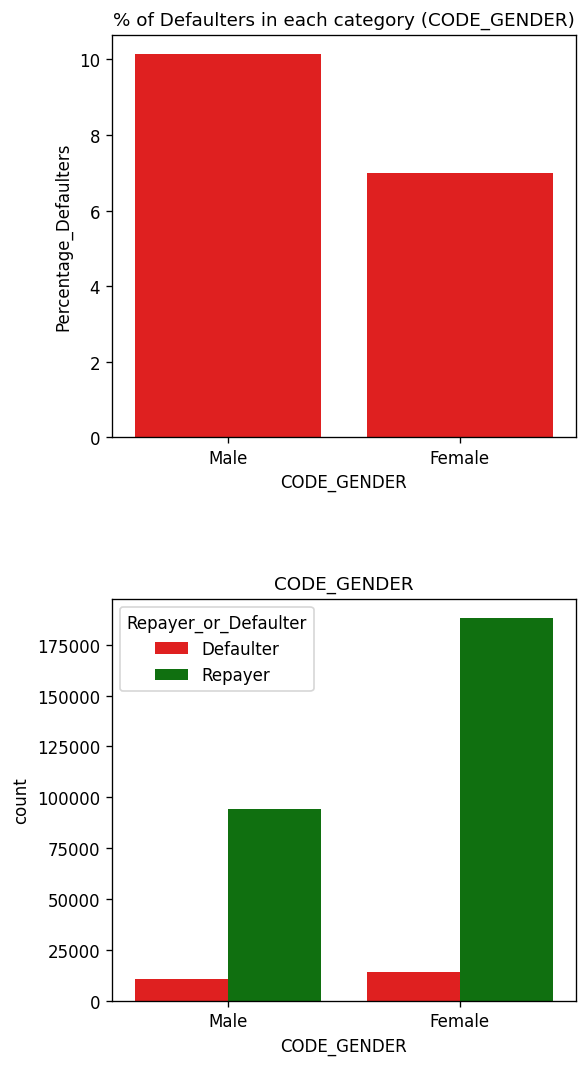

In [32]:
apls['CODE_GENDER']=apls['CODE_GENDER'].apply(lambda x:'Female' if x=='F' else 'Male')
apls_univariate_categorical('CODE_GENDER')

#### Insigits:-
- 10% of the male clients are defaulters and 7% of the female clients are defaulters
- Less risk is associated with female clients

#### AGE

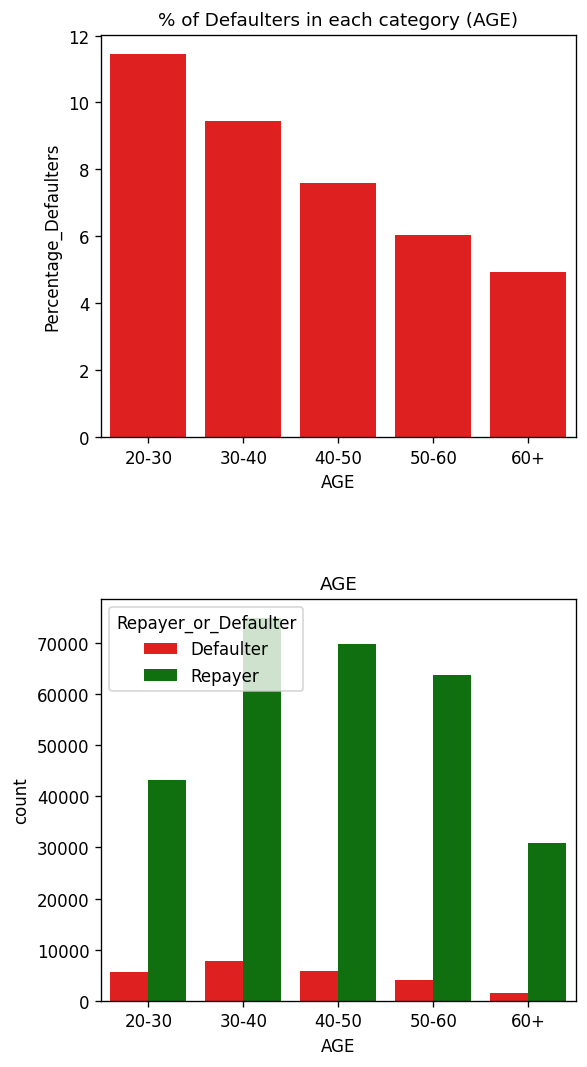

In [33]:
apls[apls['AGE']<20]#No clients whose age is less than 20 years
apls['AGE']=pd.cut(apls['AGE'], [20,30,40,50,60,999], labels=['20-30', '30-40', '40-50', '50-60', '60+'])
apls_univariate_categorical('AGE')

#### Insigits:-
- 10% of the 20-40 age group clients are defaulters, 7% of the 40-60 age group clients are defaulters and 5% of 60+ age groups are defaulters
- More the age of the client, less is the defaulting rate
- Less risk is associated with older people

#### CNT_CHILDREN

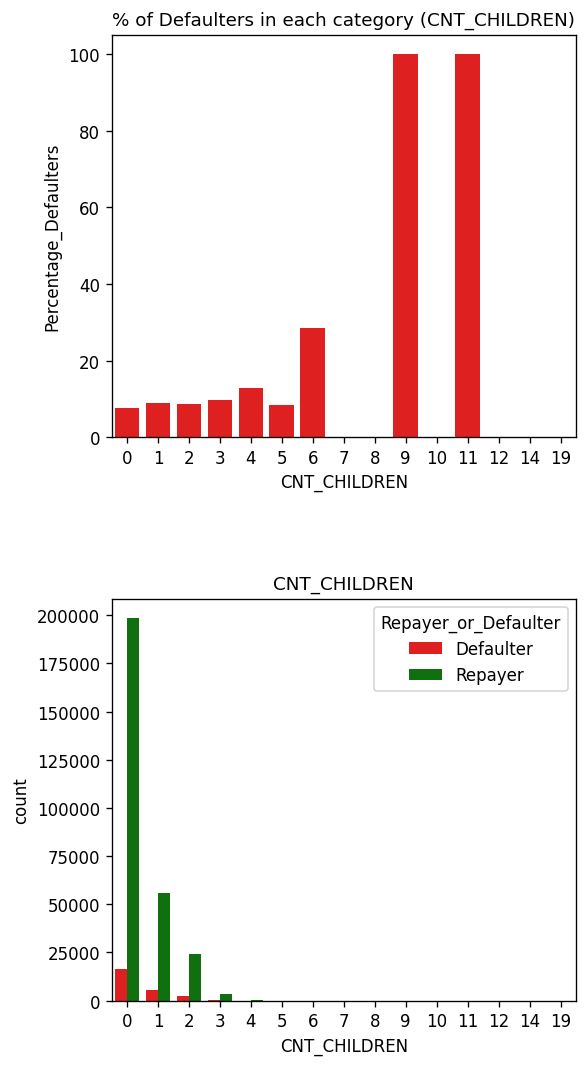

In [34]:
apls_univariate_categorical('CNT_CHILDREN')

#### Insigits:- 
- Clients with children <=3 have less defaulters (<=10%)
- Not strong insights, as less data is available for children more than 5

#### AMT_INCOME_TOTAL

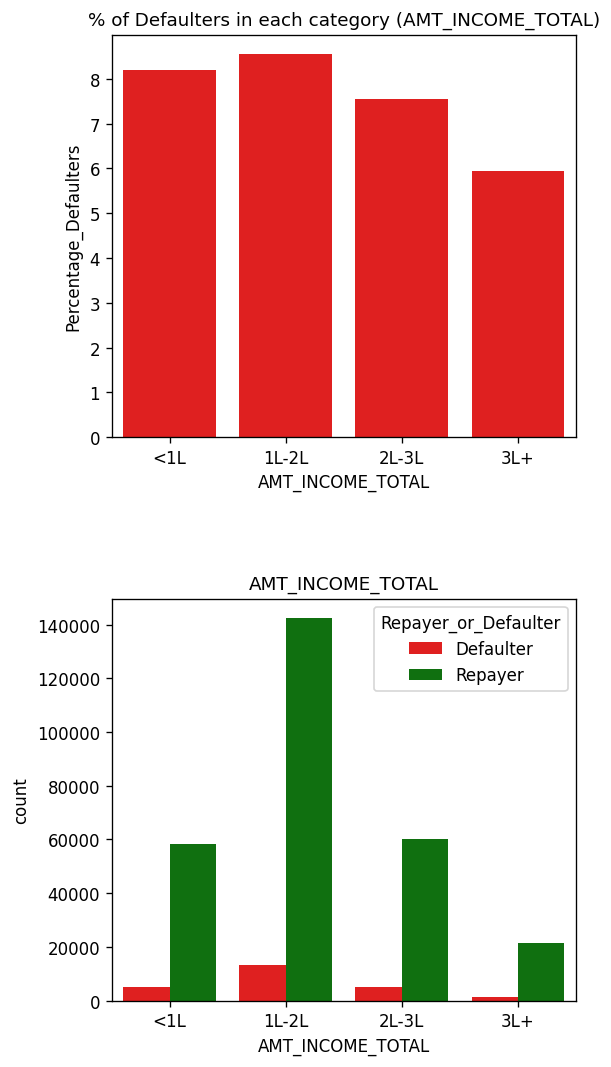

In [35]:
apls['AMT_INCOME_TOTAL'].describe()
apls['AMT_INCOME_TOTAL']=pd.cut(apls['AMT_INCOME_TOTAL'], [0,100000,200000,300000,9999999999], labels=['<1L', '1L-2L', '2L-3L', '3L+'])
apls_univariate_categorical('AMT_INCOME_TOTAL')

#### Insights:-
- Clients having total income more than 3 Lakhs have less defaulting rate (less risk associated)
- Clients having total income less than 2 Lakhs have more defaulting rate
- More the income less is the defaulting rate of the clients

#### FLAG_OWN_CAR

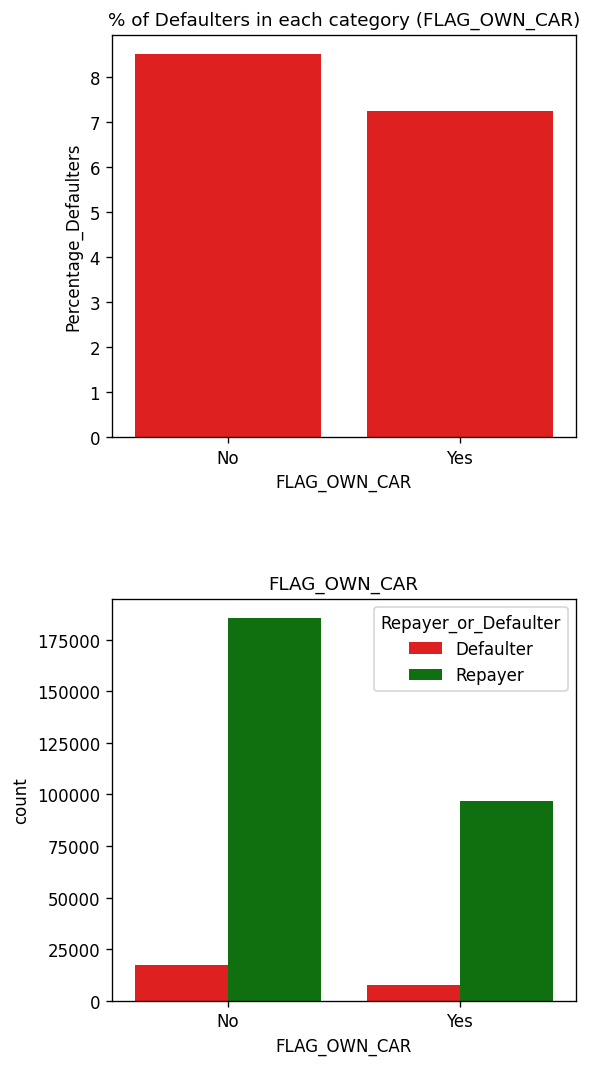

In [36]:
apls['FLAG_OWN_CAR']=apls['FLAG_OWN_CAR'].apply(lambda x:'Yes' if x=='Y' else 'No')
apls_univariate_categorical('FLAG_OWN_CAR')

#### Insigits:-
- More than 8% of clients with car are defaulters and 7% of clents with car are defaulters
- No strong insights from this as there is not much difference

#### FLAG_OWN_REALTY

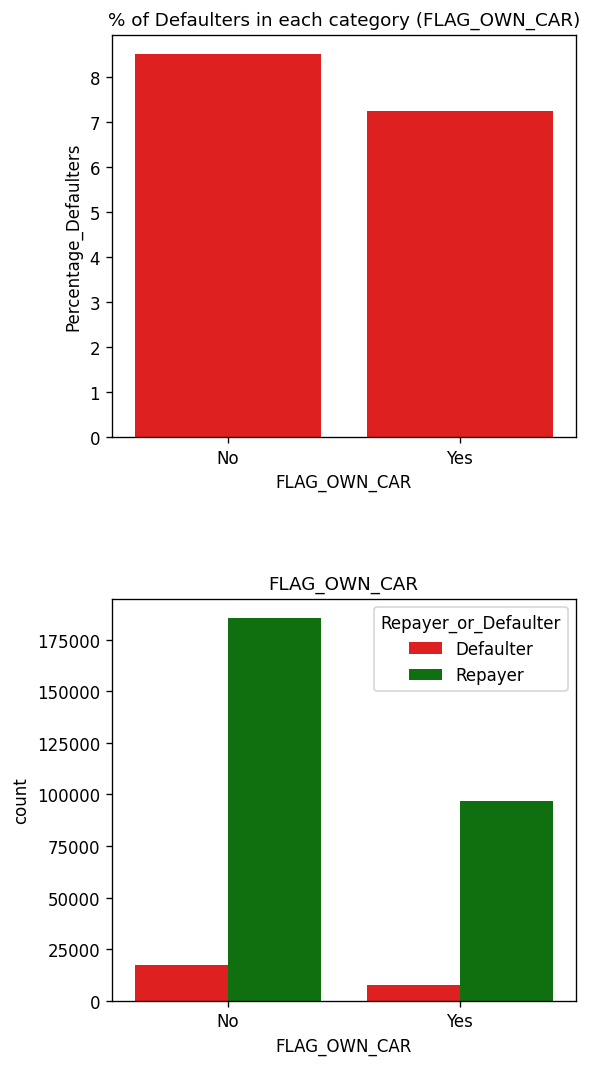

In [37]:
apls['FLAG_OWN_REALTY']=apls['FLAG_OWN_REALTY'].apply(lambda x:'Yes' if x=='Y' else 'No')
apls_univariate_categorical('FLAG_OWN_CAR')

#### Insigits:-
- More than 8% of clients without House/Flat are defaulters and 7% of clents with House/Flat are defaulters
- No strong insights from this as there is not much difference

#### NAME_INCOME_TYPE

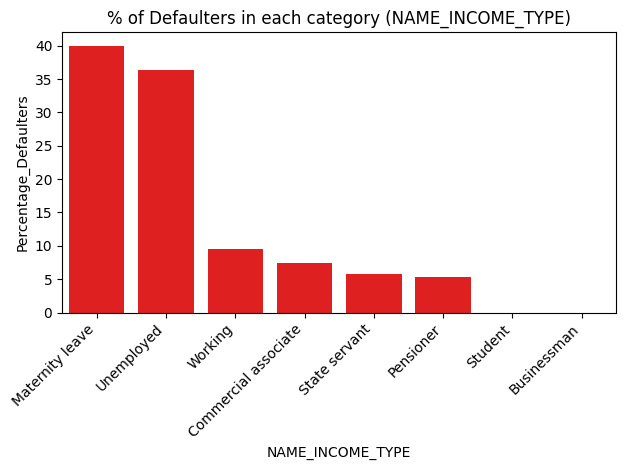

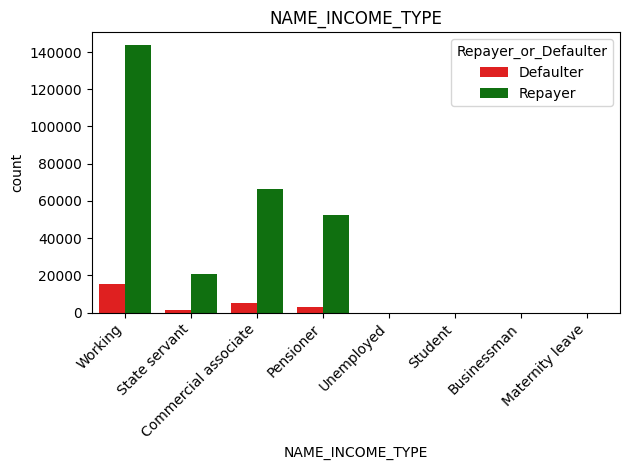

In [38]:
chart1 = apls['NAME_INCOME_TYPE'].value_counts().to_frame(name='Value_Counts')
defaulters = apls.groupby('NAME_INCOME_TYPE')['TARGET'].sum()

# Merge and compute defaulter percentage
chart = pd.concat([chart1, defaulters], axis=1).rename(columns={'TARGET': 'Defaulters'})
chart['Percentage_Defaulters'] = (chart['Defaulters'] / chart['Value_Counts']) * 100
chart = chart[['Percentage_Defaulters']].reset_index().sort_values('Percentage_Defaulters', ascending=False)

# Plot 1: Barplot of defaulter percentage
a = sns.barplot(data=chart, x='NAME_INCOME_TYPE', y='Percentage_Defaulters', color='Red')
a.set_xticklabels(a.get_xticklabels(), rotation=45, ha='right')
plt.title('% of Defaulters in each category (NAME_INCOME_TYPE)')
plt.tight_layout()
plt.show()

# Plot 2: Countplot of category split by target
b = sns.countplot(data=apls, x='NAME_INCOME_TYPE', hue='Repayer_or_Defaulter', palette=['Red', 'Green'])
b.set_xticklabels(b.get_xticklabels(), rotation=45, ha='right')
plt.title('NAME_INCOME_TYPE')
plt.tight_layout()
plt.show()

#### Insigits:- 
- Very high % of defaulters in 'Maternity Leave' & 'Unemployed' category. But the counts are very less, so can be ignored.
- Working professionals and commercial associates have litter higher default rate
- Pensioners and State Servants has less default rate comparatively (Less risk with them)

#### NAME_EDUCATION_TYPE

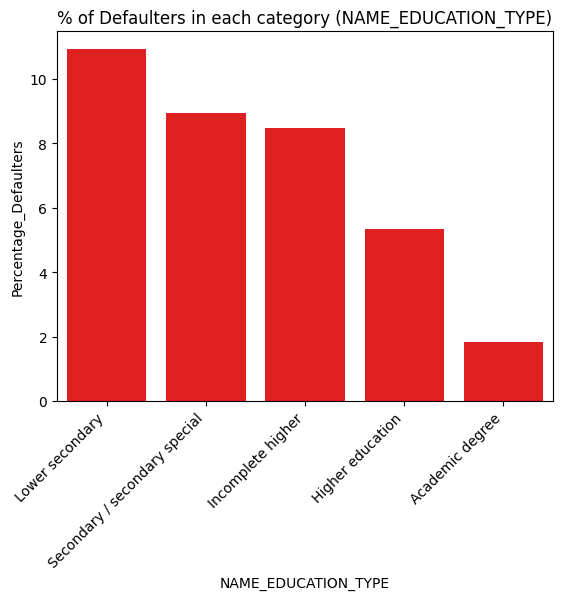

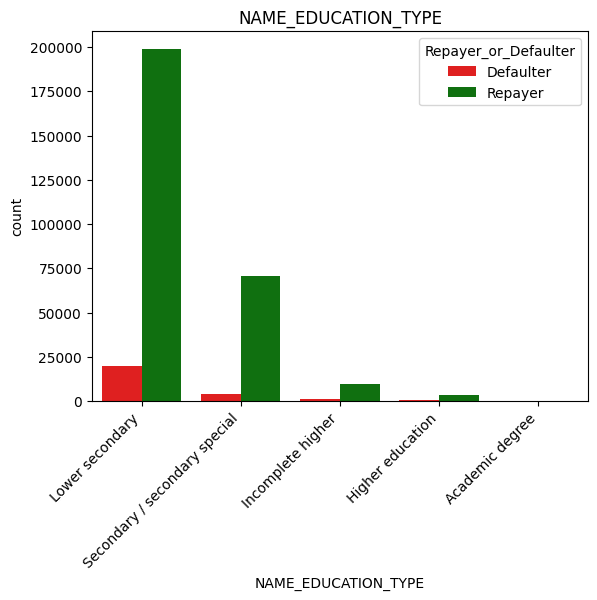

In [39]:
chart1 = apls['NAME_EDUCATION_TYPE'].value_counts().to_frame(name='Value_Counts')
defaulters=apls.groupby('NAME_EDUCATION_TYPE')['TARGET'].sum()

chart=pd.concat([chart1,defaulters], axis=1).rename(columns={'TARGET': 'Defaulters'})
chart['Percentage_Defaulters']=(chart['Defaulters']/chart['Value_Counts'])*100
chart=chart.drop(columns=['Value_Counts', 'Defaulters'])
chart.index.name='NAME_EDUCATION_TYPE'
chart=chart.reset_index()
chart.sort_values('Percentage_Defaulters', ascending=False, inplace=True)

a=sns.barplot(data=chart, x='NAME_EDUCATION_TYPE', y='Percentage_Defaulters', color='Red')
a.set_xticklabels(a.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('% of Defaulters in each category (NAME_EDUCATION_TYPE)')
plt.show()

b = sns.countplot(data=apls, x='NAME_EDUCATION_TYPE', hue='Repayer_or_Defaulter', palette=['Red', 'Green'])
b.set_xticklabels(a.get_xticklabels(), rotation=45, ha='right')
plt.title('NAME_EDUCATION_TYPE')
plt.show()

#### Insigits:-
- Clients have higher default rate who have lower secondary, secondary special or Incomplete higher education type
- Clients with Academic degree or Higher education tend to default less
- Less risk associated is with Academic degree and Higher education holders

#### NAME_FAMILY_STATUS

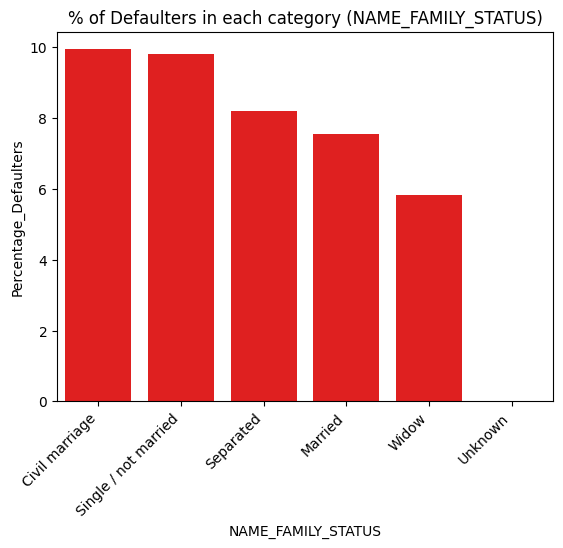

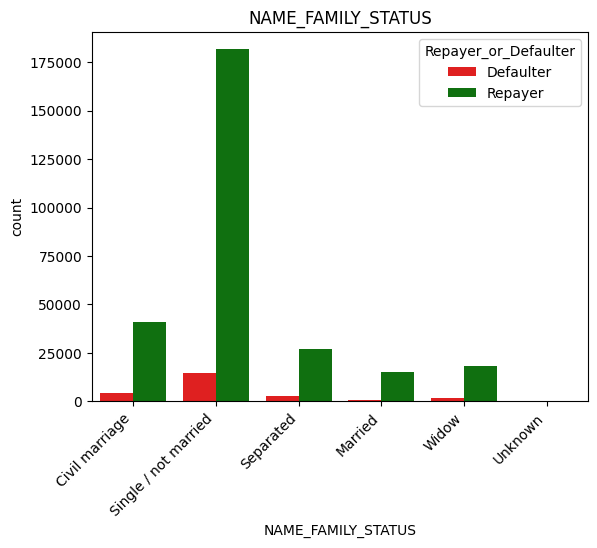

In [40]:
chart1 = apls['NAME_FAMILY_STATUS'].value_counts().to_frame(name='Value_Counts')
defaulters=apls.groupby('NAME_FAMILY_STATUS')['TARGET'].sum()

chart=pd.concat([chart1,defaulters], axis=1).rename(columns={'TARGET': 'Defaulters'})
chart['Percentage_Defaulters']=(chart['Defaulters']/chart['Value_Counts'])*100
chart=chart.drop(columns=['Value_Counts', 'Defaulters'])
chart.index.name='NAME_FAMILY_STATUS'
chart=chart.reset_index()
chart.sort_values('Percentage_Defaulters', ascending=False, inplace=True)

a=sns.barplot(data=chart, x='NAME_FAMILY_STATUS', y='Percentage_Defaulters', color='Red')
a.set_xticklabels(a.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('% of Defaulters in each category (NAME_FAMILY_STATUS)')
plt.show()

b = sns.countplot(data=apls, x='NAME_FAMILY_STATUS', hue='Repayer_or_Defaulter', palette=['Red', 'Green'])
b.set_xticklabels(a.get_xticklabels(), rotation=45, ha='right')
plt.title('NAME_FAMILY_STATUS')
plt.show()

#### Insigits:-
- Single and Civil married clients have more defaulting rate
- Clients who are Widow have less defaulting rate (Less risk), Married clients are also in the acceptable range (6-8%)

#### NAME_HOUSING_TYPE

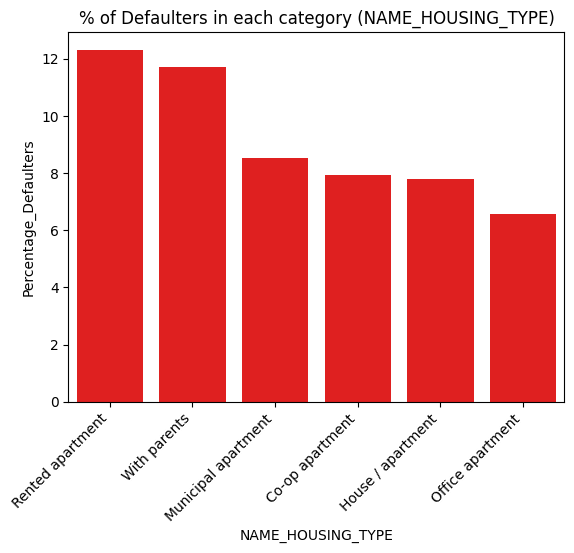

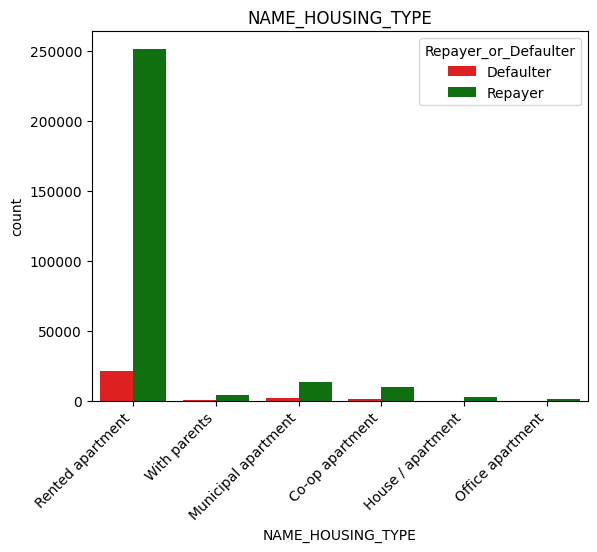

In [41]:
chart1 = apls['NAME_HOUSING_TYPE'].value_counts().to_frame(name='Value_Counts')
defaulters=apls.groupby('NAME_HOUSING_TYPE')['TARGET'].sum()

chart=pd.concat([chart1,defaulters], axis=1).rename(columns={'TARGET': 'Defaulters'})
chart['Percentage_Defaulters']=(chart['Defaulters']/chart['Value_Counts'])*100
chart=chart.drop(columns=['Value_Counts', 'Defaulters'])
chart.index.name='NAME_HOUSING_TYPE'
chart=chart.reset_index()
chart.sort_values('Percentage_Defaulters', ascending=False, inplace=True)

a=sns.barplot(data=chart, x='NAME_HOUSING_TYPE', y='Percentage_Defaulters', color='Red')
a.set_xticklabels(a.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('% of Defaulters in each category (NAME_HOUSING_TYPE)')
plt.show()

b = sns.countplot(data=apls, x='NAME_HOUSING_TYPE', hue='Repayer_or_Defaulter', palette=['Red', 'Green'])
b.set_xticklabels(a.get_xticklabels(), rotation=45, ha='right')
plt.title('NAME_HOUSING_TYPE')
plt.show()

#### Insigits:-
- Clients living in Rented apartments or With parents have higher defaulting rate
- Clients living in Office apartments (Less counts) or owning a House/apartment have less defaulting rate (less risk associated)

#### OCCUPATION_TYPE

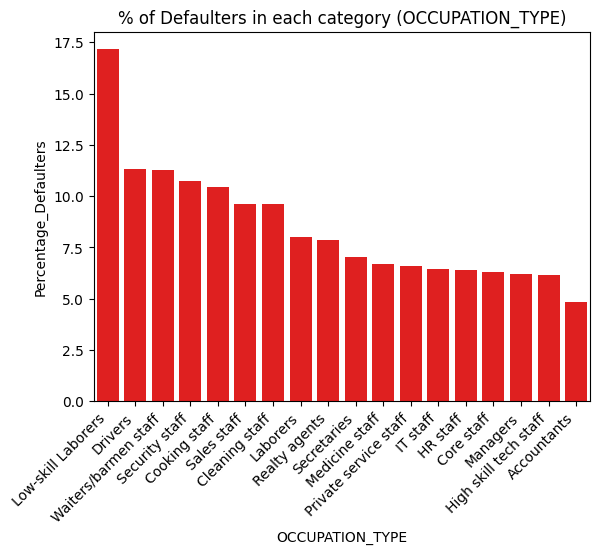

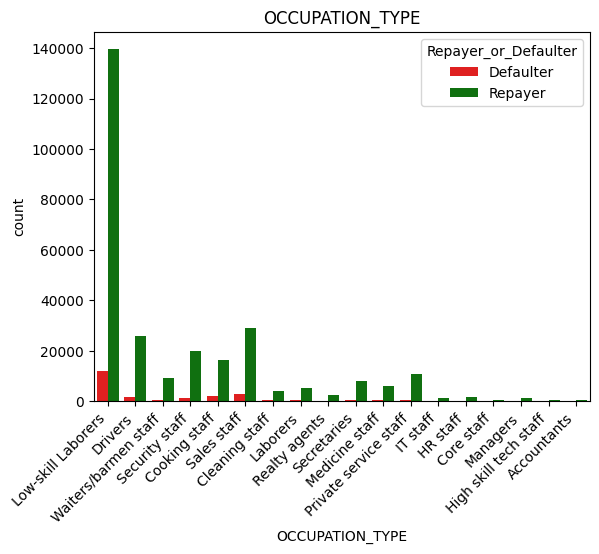

In [42]:
chart1 = apls['OCCUPATION_TYPE'].value_counts().to_frame(name='Value_Counts')
defaulters=apls.groupby('OCCUPATION_TYPE')['TARGET'].sum()

chart=pd.concat([chart1,defaulters], axis=1).rename(columns={'TARGET': 'Defaulters'})
chart['Percentage_Defaulters']=(chart['Defaulters']/chart['Value_Counts'])*100
chart=chart.drop(columns=['Value_Counts', 'Defaulters'])
chart.index.name='OCCUPATION_TYPE'
chart=chart.reset_index()
chart.sort_values('Percentage_Defaulters', ascending=False, inplace=True)

a=sns.barplot(data=chart, x='OCCUPATION_TYPE', y='Percentage_Defaulters', color='Red')
a.set_xticklabels(a.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('% of Defaulters in each category (OCCUPATION_TYPE)')
plt.show()

b = sns.countplot(data=apls, x='OCCUPATION_TYPE', hue='Repayer_or_Defaulter', palette=['Red', 'Green'])
b.set_xticklabels(a.get_xticklabels(), rotation=45, ha='right')
plt.title('OCCUPATION_TYPE')
plt.show()

#### Insigits:-
- Sales staffs, Drivers, Security staffs, Cooking staffs, low-skill Laborers (Very high), Waiters/barmen staffs have high defaulting rate
- Core staffs, Managers, High skill tech staffs, Accountants, Medicines, Private service, Seceretaries, HR & IT staffs have less defaulting rate (Less risk associated)
- Others are in the acceptable range (7.5-9)

#### ORGANIZATION_TYPE

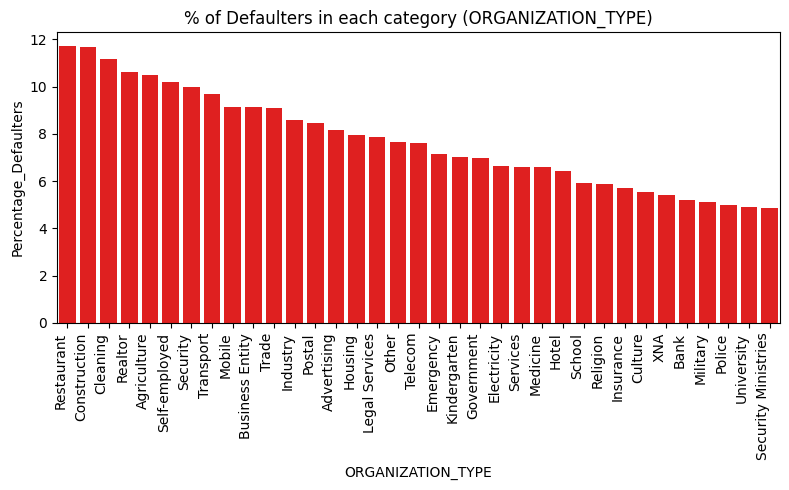

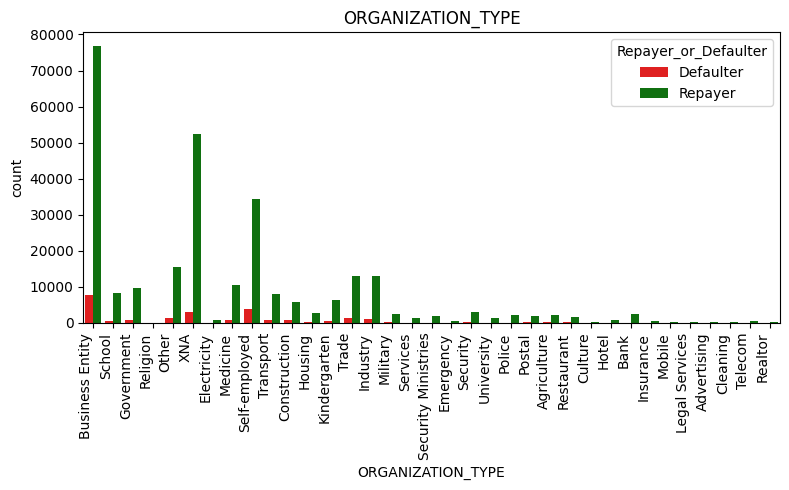

In [43]:
apls['ORGANIZATION_TYPE'] = apls['ORGANIZATION_TYPE'].apply(lambda x: 'Industry' if 'Industry' in x else x)
apls['ORGANIZATION_TYPE'] = apls['ORGANIZATION_TYPE'].apply(lambda x: 'Transport' if 'Transport' in x else x)
apls['ORGANIZATION_TYPE'] = apls['ORGANIZATION_TYPE'].apply(lambda x: 'Trade' if 'Trade' in x else x)
apls['ORGANIZATION_TYPE'] = apls['ORGANIZATION_TYPE'].apply(lambda x: 'Business Entity' if 'Business' in x else x)

chart1 = apls['ORGANIZATION_TYPE'].value_counts().to_frame(name='Value_Counts')
defaulters = apls.groupby('ORGANIZATION_TYPE')['TARGET'].sum()

chart = pd.concat([chart1, defaulters], axis=1).rename(columns={'TARGET': 'Defaulters'})
chart['Percentage_Defaulters'] = (chart['Defaulters'] / chart['Value_Counts']) * 100
chart = chart.drop(columns=['Value_Counts', 'Defaulters'])
chart.index.name = 'ORGANIZATION_TYPE'
chart = chart.reset_index()
chart.sort_values('Percentage_Defaulters', ascending=False, inplace=True)

plt.figure(figsize=(8, 5))
a = sns.barplot(data=chart, x='ORGANIZATION_TYPE', y='Percentage_Defaulters', color='Red')
a.set_xticklabels(a.get_xticklabels(), rotation=90, ha ='right')
plt.title('% of Defaulters in each category (ORGANIZATION_TYPE)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
b = sns.countplot(data=apls, x='ORGANIZATION_TYPE', hue='Repayer_or_Defaulter', palette=['Red', 'Green'])
b.set_xticklabels(b.get_xticklabels(), rotation=90, ha='right')
plt.title('ORGANIZATION_TYPE')
plt.tight_layout()
plt.show()

#### Insigits:-
- Less risk (<6%) associated with clients coming from Educational Universities, Medicine, Military, Bank, Police, Security Ministers, Insurance & Cultural organizations type
- Very high risk (>10%) in Self-employed, Transport, Construction, Agriculture, Restaurants, Relator, Cleaning organizations type
- Others are in the acceptable range but can be provided with high interest

#### AMT_CREDIT

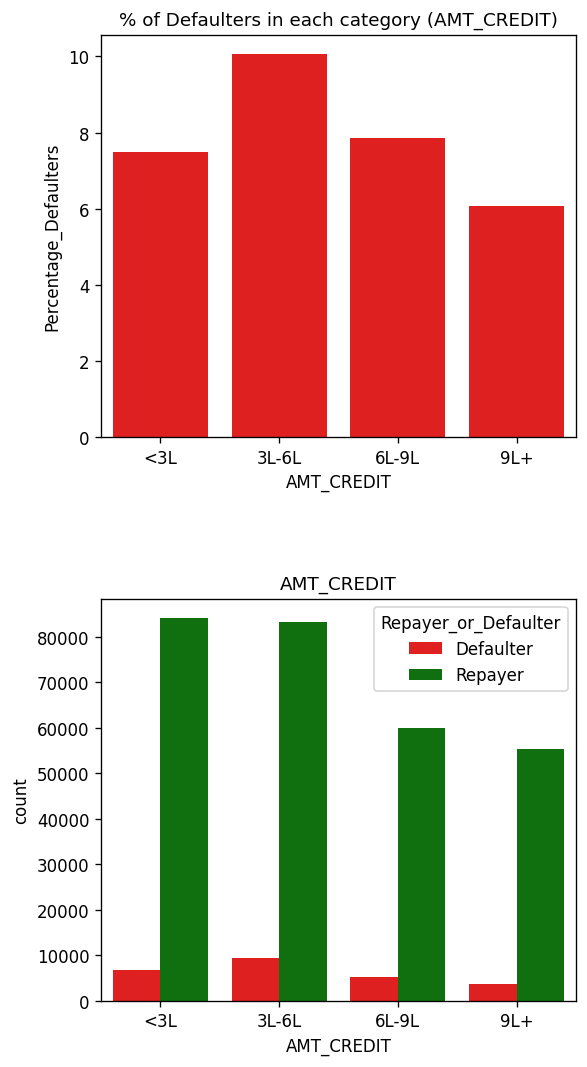

In [44]:
apls['AMT_CREDIT']=pd.cut(apls['AMT_CREDIT'], [0,300000,600000,900000,99999999999], labels=['<3L', '3L-6L', '6L-9L', '9L+'])
apls_univariate_categorical('AMT_CREDIT')

#### Insights:-
- Clients who have requested for credit between 3-6 Lakhs have more defaulting rate (>9%)
- Clients who have requested for credit more than 9 lakhs have less defaulting rate (<6%)
- Others are in the acceptable range

#### PERCENTAGE_ADDRESS_MATCH
- Here address match mean the total adresses (ex: contact, work, permenant addresses) given by the client and the matching percentage between each other 

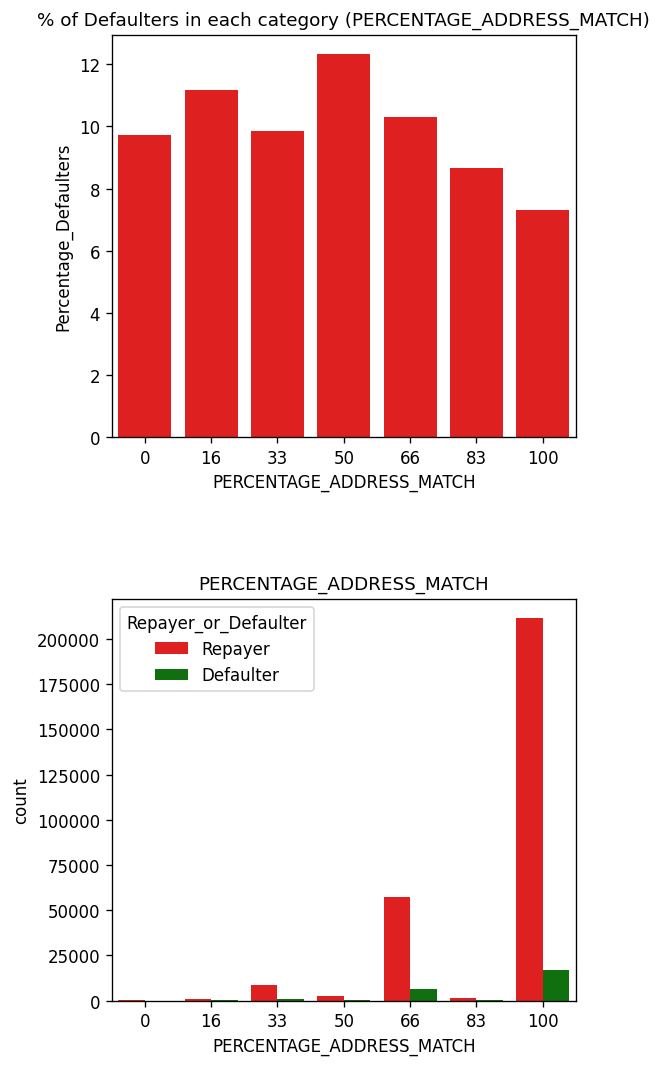

In [45]:
apls['PERCENTAGE_ADDRESS_MATCH']=apls['PERCENTAGE_ADDRESS_MATCH'].apply(lambda x:int(round(x,1)))
apls_univariate_categorical('PERCENTAGE_ADDRESS_MATCH')

#### Insigits:-
- Clients whose address match percent <50% have more defaulting rate
- Clients whose address match percent is 100% have less defaulting rate (<8%)

#### DAYS_INFO_CHANGED (Registration & ID)

In [46]:
apls['DAYS_REGISTRATION']= abs(apls['DAYS_REGISTRATION'])
apls['DAYS_ID_PUBLISH']= abs(apls['DAYS_ID_PUBLISH'])
apls['DAYS_INFO_CHANGED']=apls[['DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']].mean(axis=1)
apls['DAYS_INFO_CHANGED'].describe()

count    307511.000000
mean       3990.161350
std        1985.752574
min           1.500000
25%        2489.000000
50%        3777.000000
75%        5343.000000
max       14437.000000
Name: DAYS_INFO_CHANGED, dtype: float64

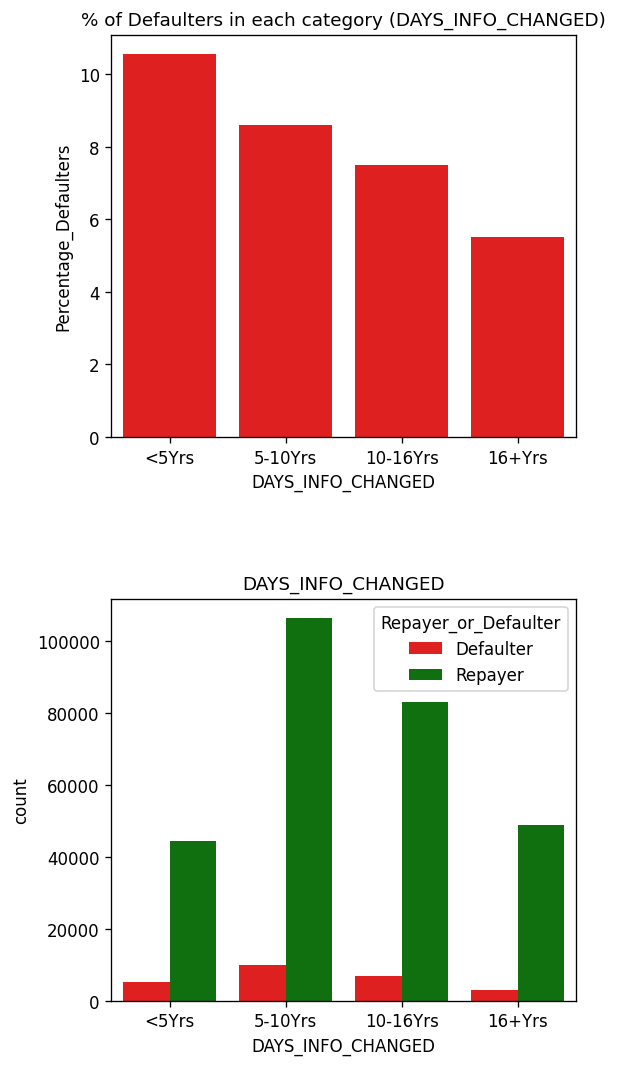

In [47]:
apls['DAYS_INFO_CHANGED']=pd.cut(apls['DAYS_INFO_CHANGED'], [0,2000,4000,6000,999999], labels=['<5Yrs', '5-10Yrs', '10-16Yrs', '16+Yrs'])
apls_univariate_categorical('DAYS_INFO_CHANGED')

#### Insights:-
- Clients who have changed their information <5 years have more defaulting rate
- Clients who have changed their information >5 years have less defaulting rate
- Clients who have changed their information >16 years age have very less defaulting rate (Less risk asccociated)
- Insights can't be taken seriously from this plot as the variable is of not high reliability.

#### CNT_FAM_MEMBERS

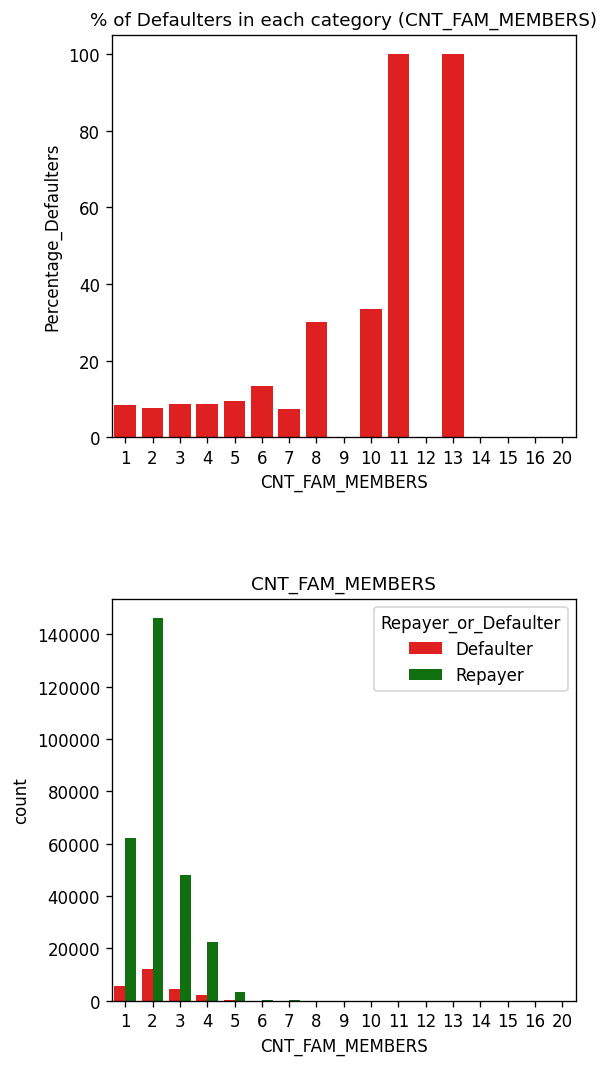

In [48]:
apls['CNT_FAM_MEMBERS']=apls['CNT_FAM_MEMBERS'].astype(int)
apls_univariate_categorical('CNT_FAM_MEMBERS')

#### Insights:-
- Clients having the family members <=5 have lesser defaulting rate
- For others data count is less to gain the insights

#### CLIENT_REGION_RATING (1-3, 1:-Low & 3:-High)

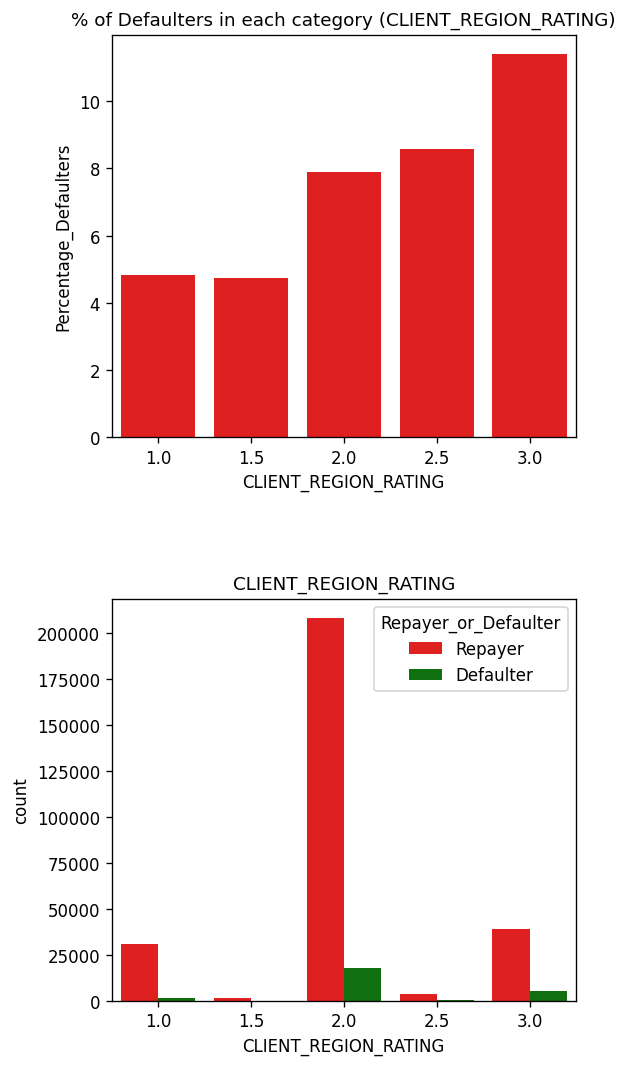

In [49]:
apls_univariate_categorical('CLIENT_REGION_RATING')

#### Insights:-
- Clients from region that has 3 rating have higher defaulting rate
- Clients from region that has <2 rating have lesser defaulting rate
- Clients from region that has 2 rating have medium defaulting rate (Acceptable range)
- This insights are actually inverse of the expected results

#### DAYS_LAST_PHONE_CHANGE

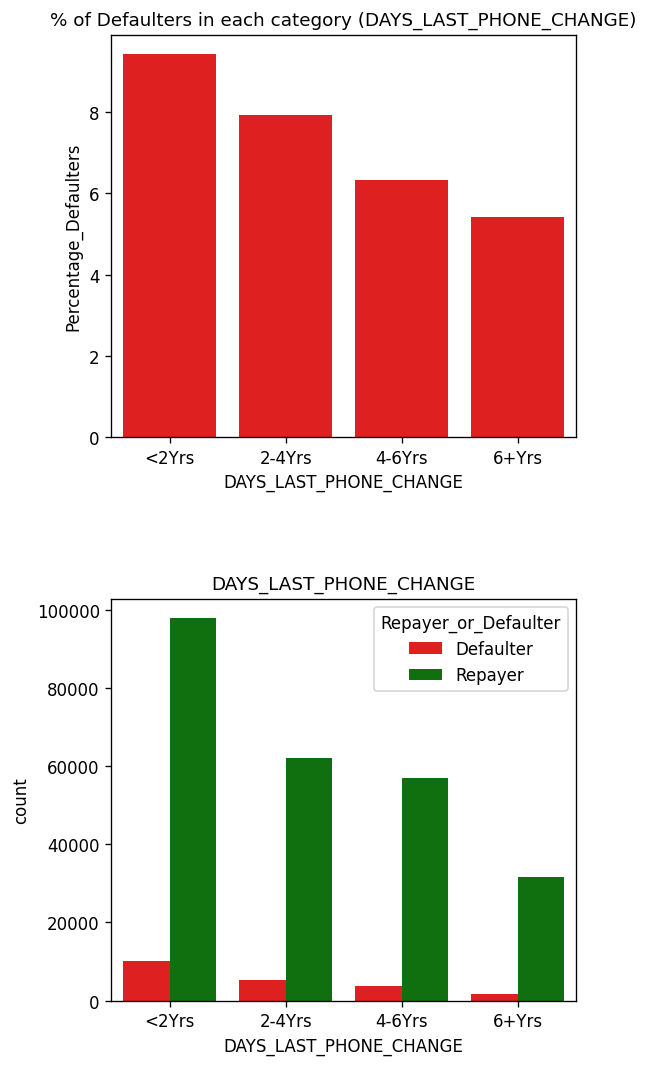

In [50]:
apls['DAYS_LAST_PHONE_CHANGE']=pd.cut(apls['DAYS_LAST_PHONE_CHANGE'], [0,700,1400,2100,999999], labels=['<2Yrs', '2-4Yrs', '4-6Yrs', '6+Yrs'])
apls_univariate_categorical('DAYS_LAST_PHONE_CHANGE')

#### Insights:-
- This has a very beautiful insights
- Clients who have changed their phone numbers within 2 years from the date of loan application have higher defaulting rate
- Clients who have changed their phone numbers long back (>6 years) have lesser defaulting rate
- More the years of last phone change, lesser is the defaulting rate

### 3.8 Bivariate & Multivariate Analysis
- Target:- 'TARGET' Column
#### Creating Function to Call Heatmap

In [51]:
def apls_heatmap(x,y):
    a=apls.pivot_table(index=x,columns=y,values='TARGET_PERCENT')
    sns.heatmap(a, cmap='RdYlGn_r', center=8, annot=True, cbar_kws={'label': '% of Defaulters'})
    plt.title(x+' vs '+y)
    plt.show()

#### NAME_CONTRACT_TYPE vs CODE_GENDER

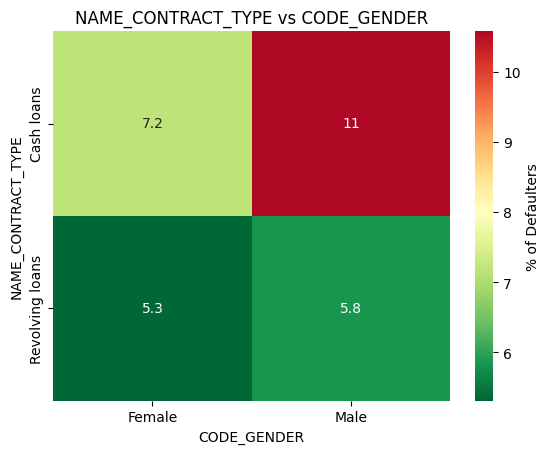

In [52]:
apls_heatmap('NAME_CONTRACT_TYPE', 'CODE_GENDER')

#### Insights:-
- High defaulting rate under Male - Cash loans category (11%)
- Low defaulting rate under Female - Revolving loans category (5.2%)
- Female-Cash loans category are in acceptable range (7.2%)

#### CODE_GENDER vs AMT_INCOME_TOTAL

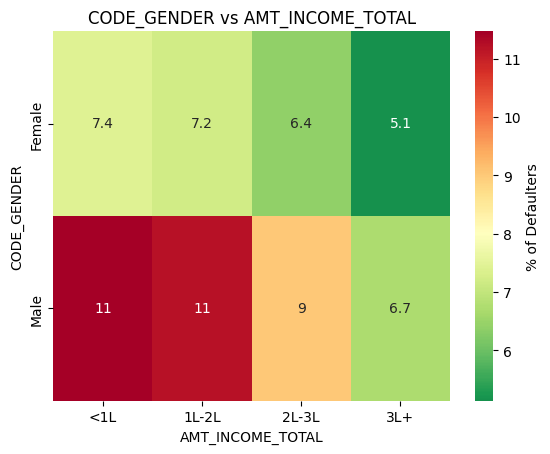

In [53]:
apls_heatmap('CODE_GENDER', 'AMT_INCOME_TOTAL')

#### Insights:-
- Male clients with income <1 Lakh have high defaulting rate (11%)
- Female clients with income >3 Lakh have less defaulting rate(5.1%)

#### AMT_INCOME_TOTAL vs AMT_CREDIT

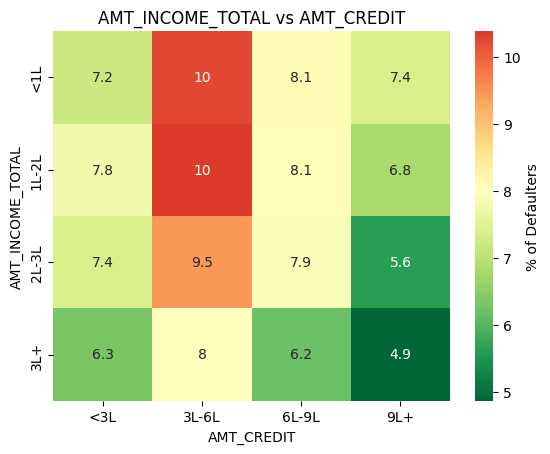

In [54]:
apls_heatmap('AMT_INCOME_TOTAL', 'AMT_CREDIT')

#### Insights:-
- Clients with less income and credit amount requested higher than their income have high defaulting rate (10%)
- Clients with more salary and equivalent credit amount requested have less defaulting rate (5-6%) (Less risk)

#### AMT_INCOME_TOTAL vs NAME_EDUCATION_TYPE

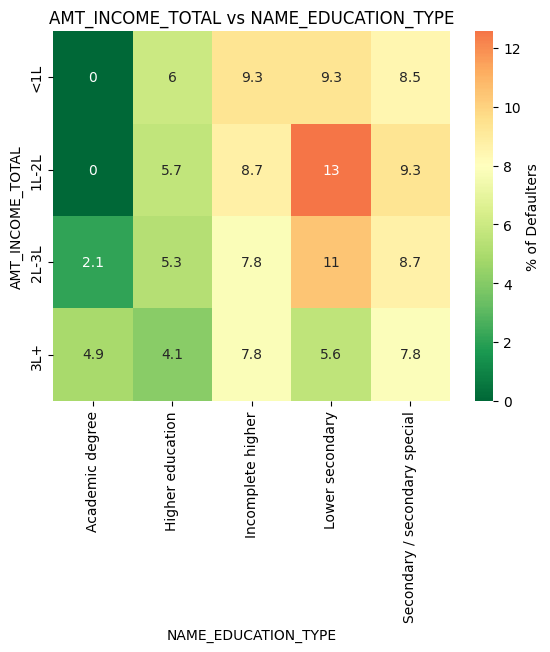

In [55]:
apls_heatmap('AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE')

#### Insights:-
- Clients with Academic degree and Higher education with all income levels have very less defaulting rate
- Clients with other education types (with all income levels) have little higher defaulting rate comparatively

#### AMT_INCOME_TOTAL vs AGE

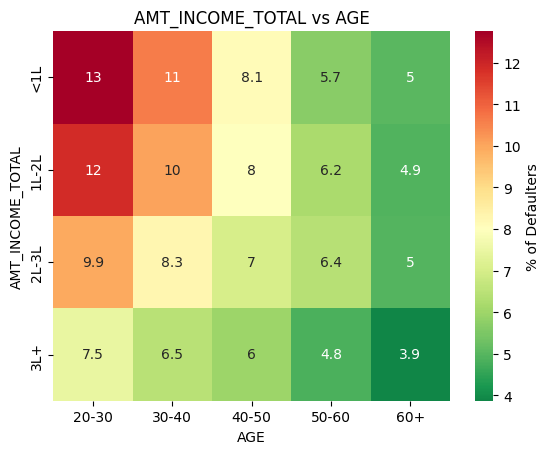

In [56]:
apls_heatmap('AMT_INCOME_TOTAL', 'AGE')

#### Insights:-
- Young clients whose age is 20-40 with income level <2-3 Lakh have high defaulting rates
- Clients whose age is more than 50 with all income levels have less defaulting rate (Less risk)
- More the age and more the income, lesser is the defaulting rate

#### AMT_INCOME_TOTAL vs DAYS_INFO_CHANGED

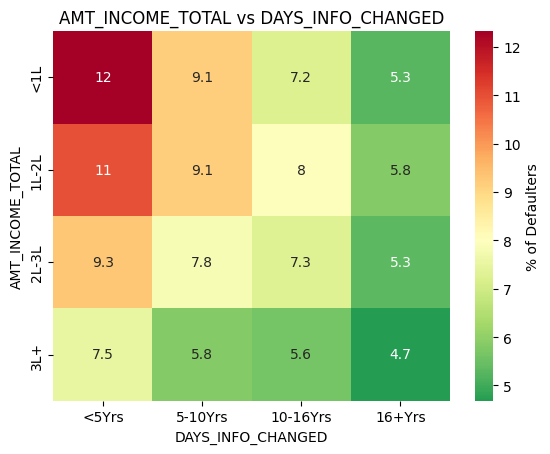

In [57]:
apls_heatmap('AMT_INCOME_TOTAL', 'DAYS_INFO_CHANGED')

#### Insights:-
- Clients with lower salary and who have changed their documents in <5 years have high defaulting rate
- Clients with all levels of salary and who haven't changed their documents from long time (>10 years) have lesser defaulting rate (less risk associated)

#### AMT_INCOME_TOTAL vs NAME_FAMILY_STATUS

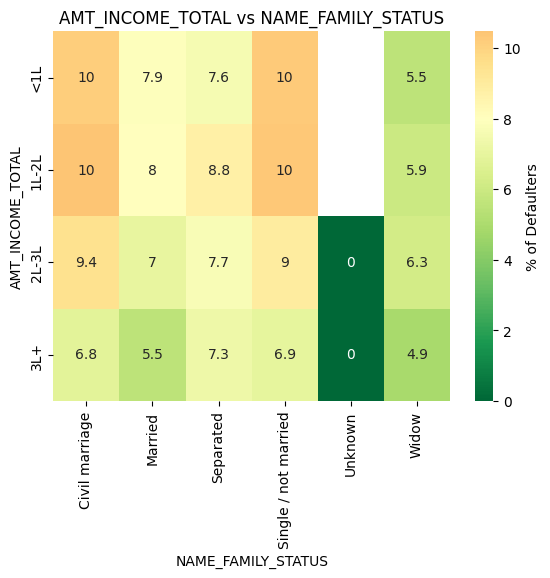

In [58]:
apls_heatmap('AMT_INCOME_TOTAL', 'NAME_FAMILY_STATUS')

#### Insights:-
- Widow clients with all types of income levels have less defaulting rate (4-6%)
- All types of clients with high income level have average defaulting rate (6-7%)

#### AMT_INCOME_TOTAL vs NAME_HOUSING_TYPE

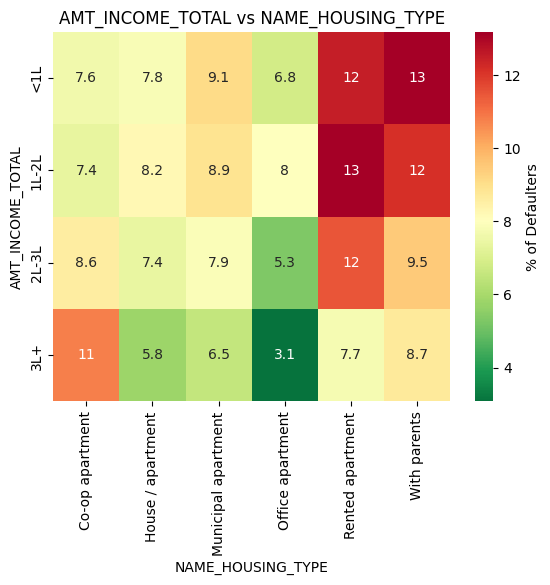

In [59]:
apls_heatmap('AMT_INCOME_TOTAL', 'NAME_HOUSING_TYPE')

#### Insights:-
- Clients with income <2 Lakhs who have either rented apartment or with their parents have very high defaulting rate (10-13%)
- Other clients who have owned apartment / office apartments have average defaulting rate (6-8%)
- Clients with office apartment or owned house/apartment with high income have very less defaulting rate (3-6%)

#### AMT_INCOME_TOTAL vs OCCUPATION_TYPE

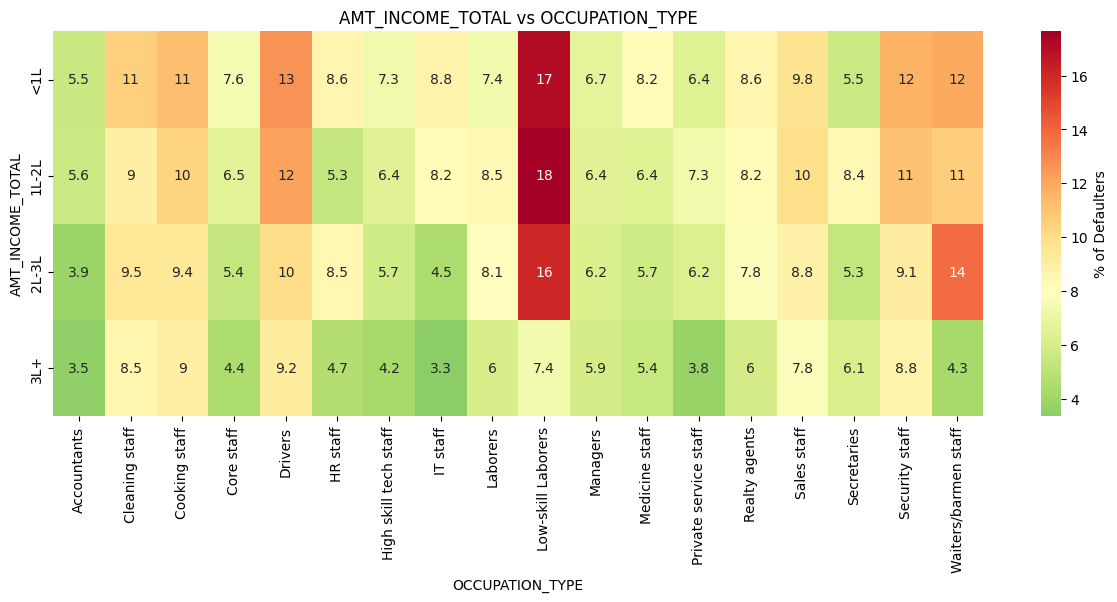

In [60]:
a=apls.pivot_table(index='AMT_INCOME_TOTAL',columns='OCCUPATION_TYPE',values='TARGET_PERCENT')
plt.figure(figsize=(15,5))
sns.heatmap(a, cmap='RdYlGn_r', center=8, annot=True, cbar_kws={'label': '% of Defaulters'})
plt.title('AMT_INCOME_TOTAL'+' vs '+'OCCUPATION_TYPE')
plt.show()

#### Insights:-
- Low-skill labours, Waiters, Drivers, Cooking & Security staffs with less income level (<3 Lakh) have very high defaulting rate

#### AMT_INCOME_TOTAL vs ORGANIZATION_TYPE

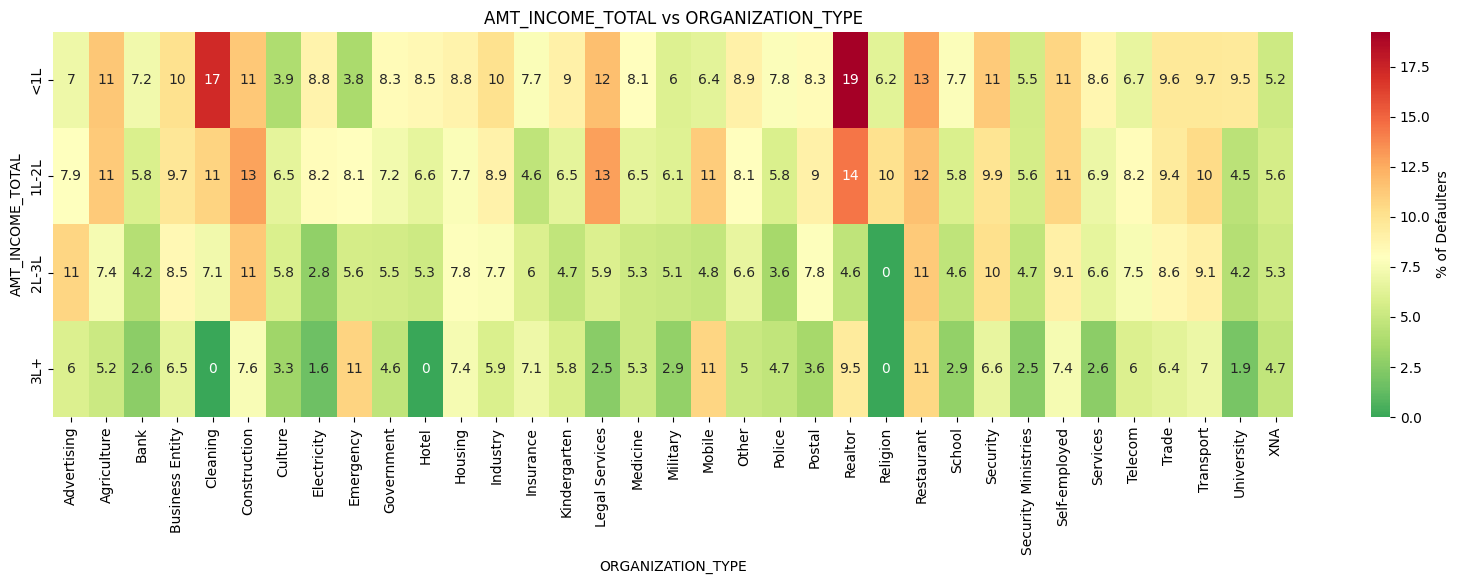

In [61]:
a=apls.pivot_table(index='AMT_INCOME_TOTAL',columns='ORGANIZATION_TYPE',values='TARGET_PERCENT')
plt.figure(figsize=(20,5))
sns.heatmap(a, cmap='RdYlGn_r', center=8, annot=True, cbar_kws={'label': '% of Defaulters'})
plt.title('AMT_INCOME_TOTAL'+' vs '+'ORGANIZATION_TYPE')
plt.show()

#### Insights:-
- Retailor and Cleaning organization type with income level <2 Lakhs have very high defaulting rate (14-19%)
- All other organization types with high income levels are having less or acceptable defaulting rates

#### AMT_INCOME_TOTAL vs DAYS_LAST_PHONE_CHANGE

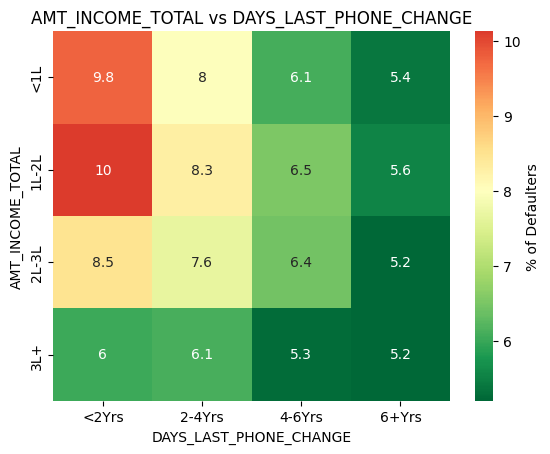

In [62]:
apls_heatmap('AMT_INCOME_TOTAL', 'DAYS_LAST_PHONE_CHANGE')

#### Insights:- 
- This provides beautiful insights
- Clients who have changed their phone number in <2-3 years have high defaulting rates
- Clients holding their phone number for longer duration (>5-6 years) have less defaulting rate (Less risk associated)

#### AMT_INCOME_TOTAL vs CLIENT_REGION_RATING

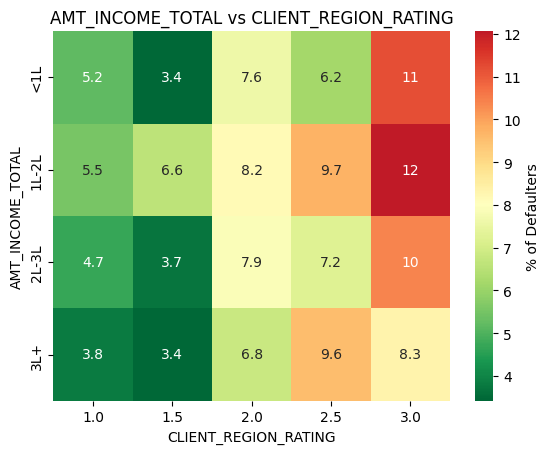

In [63]:
apls_heatmap('AMT_INCOME_TOTAL', 'CLIENT_REGION_RATING')

#### Insights:-
- Clients whose region rating is <=1.5 with all levels of income have less defaulting rate
- Clients whose region rating is between 2-2.5 have acceptable defaulting rate
- Clients from region rated with 3 (of all income levels) have high defaulting rates

#### AGE vs CNT_CHILDREN

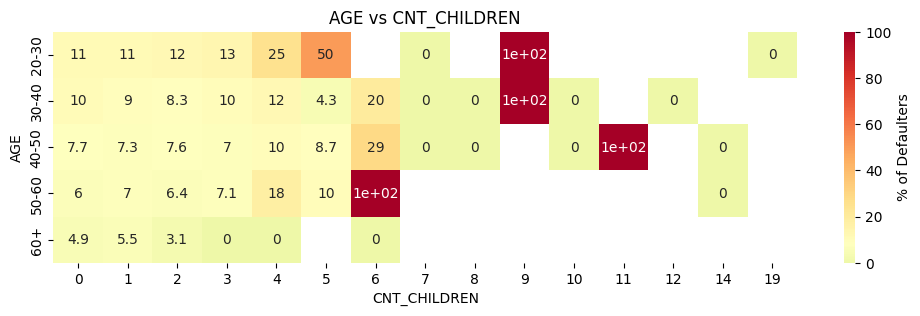

In [64]:
plt.figure(figsize=(12,3))
apls_heatmap('AGE', 'CNT_CHILDREN')
plt.show()

#### Insights (Less / No Accuracy):-
- Young Clients with more children have high defaulting rate
- Older clients with less children have less defaulting rate (Less risk associated)

#### AGE vs DAYS_REGISTRATION

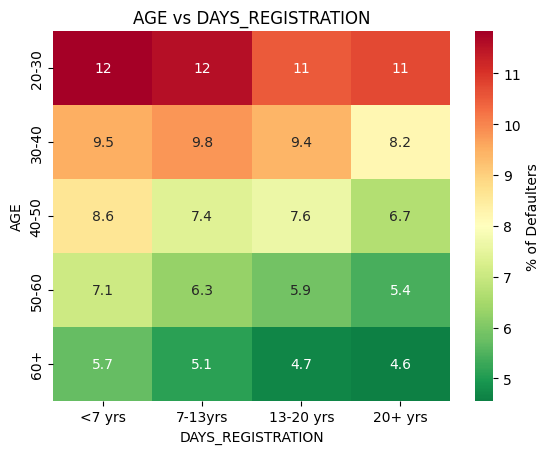

In [65]:
apls['DAYS_REGISTRATION']=pd.cut(apls['DAYS_REGISTRATION'], [0,2500,5000,7500,99999999], labels=['<7 yrs', '7-13yrs', '13-20 yrs', '20+ yrs'])
apls_heatmap('AGE', 'DAYS_REGISTRATION')

#### Insights (Less accuracy as the combination is not good):-
- Young Clients who have changed their registration within 7-10 years have high defaulting rate
- Older clients who have changed their registration 15-20 years ago have less defaulting rate (Less risk associated)

#### AGE vs CNT_FAM_MEMBERS

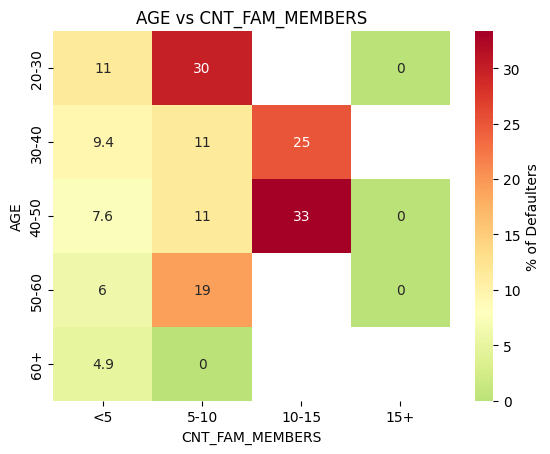

In [66]:
apls['CNT_FAM_MEMBERS']=pd.cut(apls['CNT_FAM_MEMBERS'], [0,5,10,15,200], labels=['<5', '5-10', '10-15', '15+'])
apls_heatmap('AGE', 'CNT_FAM_MEMBERS')

#### Insights (Less accuracy):-
- Mid & older clients with family members <5 have less defaulting rate (Less risk associated)
- Others have high defaulting rate or less/no data

### 3.9 Correlation

#### Filtering the Columns required for the Corrrelation Calculation

In [67]:
apls1_corr_cols=['CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'CNT_FAM_MEMBERS',
       'HOUR_APPR_PROCESS_START',
       'DAYS_LAST_PHONE_CHANGE', 'DAYS_BIRTH']

#### Segementing the datasets to Defaulters and Repayers

In [68]:
apls1_defaulters=apls1[apls1['TARGET']==1][apls1_corr_cols]
apls1_repayers=apls1[apls1['TARGET']==0][apls1_corr_cols]

#### Top 10 Correlation for Defaulters Data

In [69]:
# Top 10 correlation between the continous variables of apls1_defaulters dataset
for i in apls1_defaulters.columns:
    apls1_defaulters[i]=apls1_defaulters[i].apply(lambda x:x*-1 if x<0 else x)
c=apls1_defaulters.corr()
a=c.unstack()
apls1_corr_defaulters=pd.DataFrame(a.sort_values(kind="quicksort"))
apls1_corr_defaulters=apls1_corr_defaulters.reset_index()
apls1_corr_defaulters.columns=['Variable 1','Variable 2','Correlation']
apls1_corr_defaulters=apls1_corr_defaulters.iloc[::2]
apls1_corr_defaulters=apls1_corr_defaulters.reset_index().drop('index', axis=1)
apls1_corr_defaulters['Correlation']=apls1_corr_defaulters['Correlation'].apply(lambda x:x*-1 if x<0 else x)
apls1_corr_defaulters=apls1_corr_defaulters.sort_values('Correlation', ascending=False)
apls1_corr_defaulters=apls1_corr_defaulters[apls1_corr_defaulters['Correlation']<1]
apls1_corr_defaulters.head(10)

,Variable 1,Variable 2,Correlation
77,AMT_CREDIT,AMT_GOODS_PRICE,0.983116
76,CNT_CHILDREN,CNT_FAM_MEMBERS,0.885484
75,AMT_GOODS_PRICE,AMT_ANNUITY,0.752924
74,AMT_ANNUITY,AMT_CREDIT,0.752195
73,DAYS_EMPLOYED,DAYS_BIRTH,0.582185
72,DAYS_BIRTH,DAYS_REGISTRATION,0.289114
0,CNT_CHILDREN,DAYS_BIRTH,0.259109
71,DAYS_ID_PUBLISH,DAYS_BIRTH,0.252863
70,DAYS_ID_PUBLISH,DAYS_EMPLOYED,0.229090
1,CNT_FAM_MEMBERS,DAYS_BIRTH,0.203267


#### Plotting Heatmap for all the columns of Defaulters Data

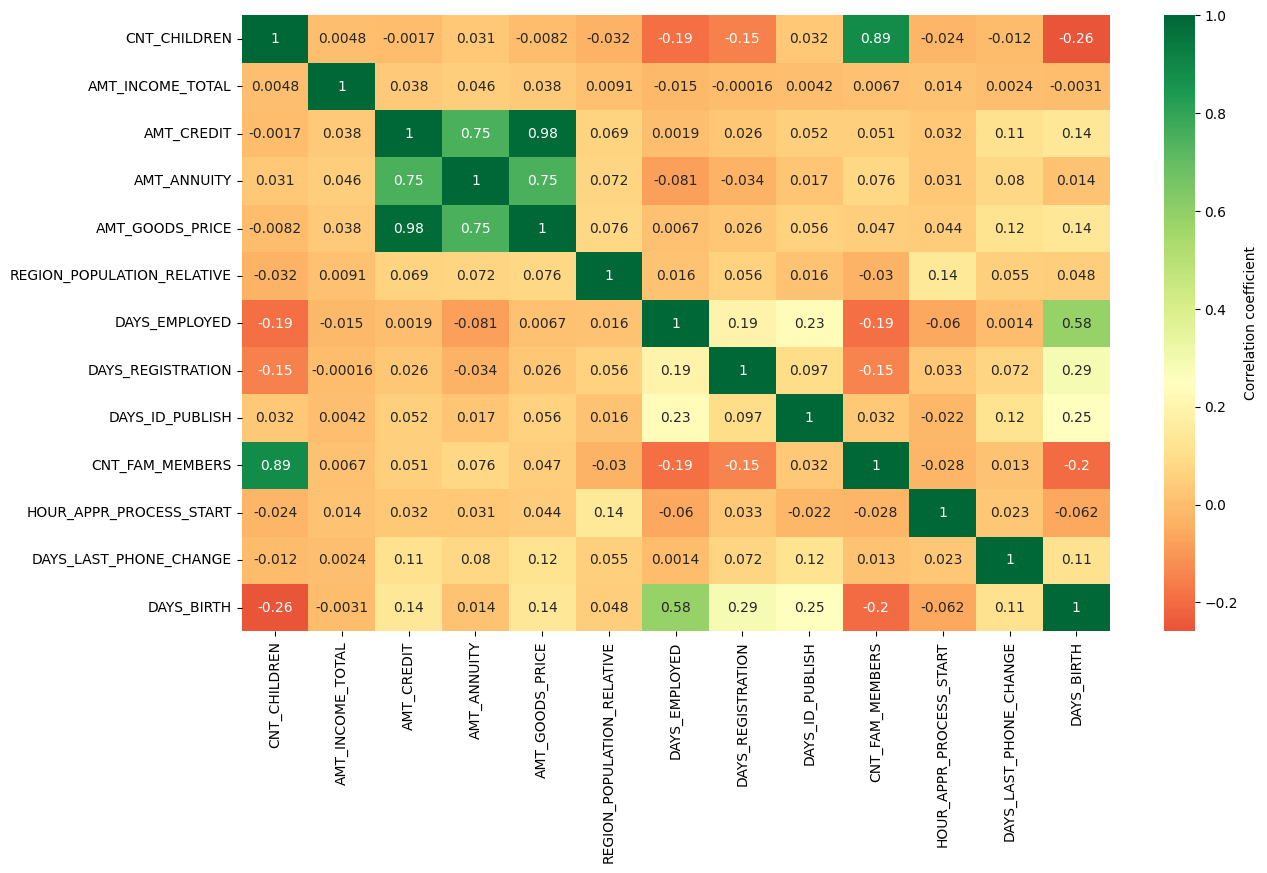

In [70]:
##Plotting the heatmap for all the columns of the apls1_defaulters dataset
plt.figure(figsize=(14,8))
sns.heatmap(data=apls1_defaulters.corr(), cmap='RdYlGn', center=0.25, annot=True, cbar_kws={'label': 'Correlation coefficient'})
plt.show()

#### Insights (Reds ends and Green ends have high correlation):-
- AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE are highly correlated to each other as AMT_CREDIT will be based on AMT_GOODS_PRICE and AMT_ANNUITY will be based on AMT_CREDIT
- CNT_CHILDREN & CNT_FAM_MEMBERS have good correlation (More the family members, more will be children in that family)

#### Top 10 Correlation for Repayers Data

In [71]:
# Top 10 correlation between the continous variables of apls1_repayers dataset
for i in apls1_repayers.columns:
    apls1_repayers[i]=apls1_repayers[i].apply(lambda x:x*-1 if x<0 else x)
c=apls1_repayers.corr()
a=c.unstack()
apls1_corr_repayers=pd.DataFrame(a.sort_values(kind="quicksort"))
apls1_corr_repayers=apls1_corr_repayers.reset_index()
apls1_corr_repayers.columns=['Variable 1','Variable 2','Correlation']
apls1_corr_repayers=apls1_corr_repayers.iloc[::2]
apls1_corr_repayers=apls1_corr_repayers.reset_index().drop('index', axis=1)
apls1_corr_repayers['Correlation']=apls1_corr_repayers['Correlation'].apply(lambda x:x*-1 if x<0 else x)
apls1_corr_repayers=apls1_corr_repayers.sort_values('Correlation', ascending=False)
apls1_corr_repayers=apls1_corr_repayers[apls1_corr_repayers['Correlation']<1]
apls1_corr_repayers.head(10)

,Variable 1,Variable 2,Correlation
77,AMT_CREDIT,AMT_GOODS_PRICE,0.987260
76,CNT_CHILDREN,CNT_FAM_MEMBERS,0.878571
75,AMT_GOODS_PRICE,AMT_ANNUITY,0.776859
74,AMT_ANNUITY,AMT_CREDIT,0.771297
73,DAYS_EMPLOYED,DAYS_BIRTH,0.626114
72,AMT_INCOME_TOTAL,AMT_ANNUITY,0.418948
71,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349672
70,AMT_INCOME_TOTAL,AMT_CREDIT,0.342799
0,CNT_CHILDREN,DAYS_BIRTH,0.336966
69,DAYS_BIRTH,DAYS_REGISTRATION,0.333151


#### Plotting the heatmap for all the columns of the Repayers dataset

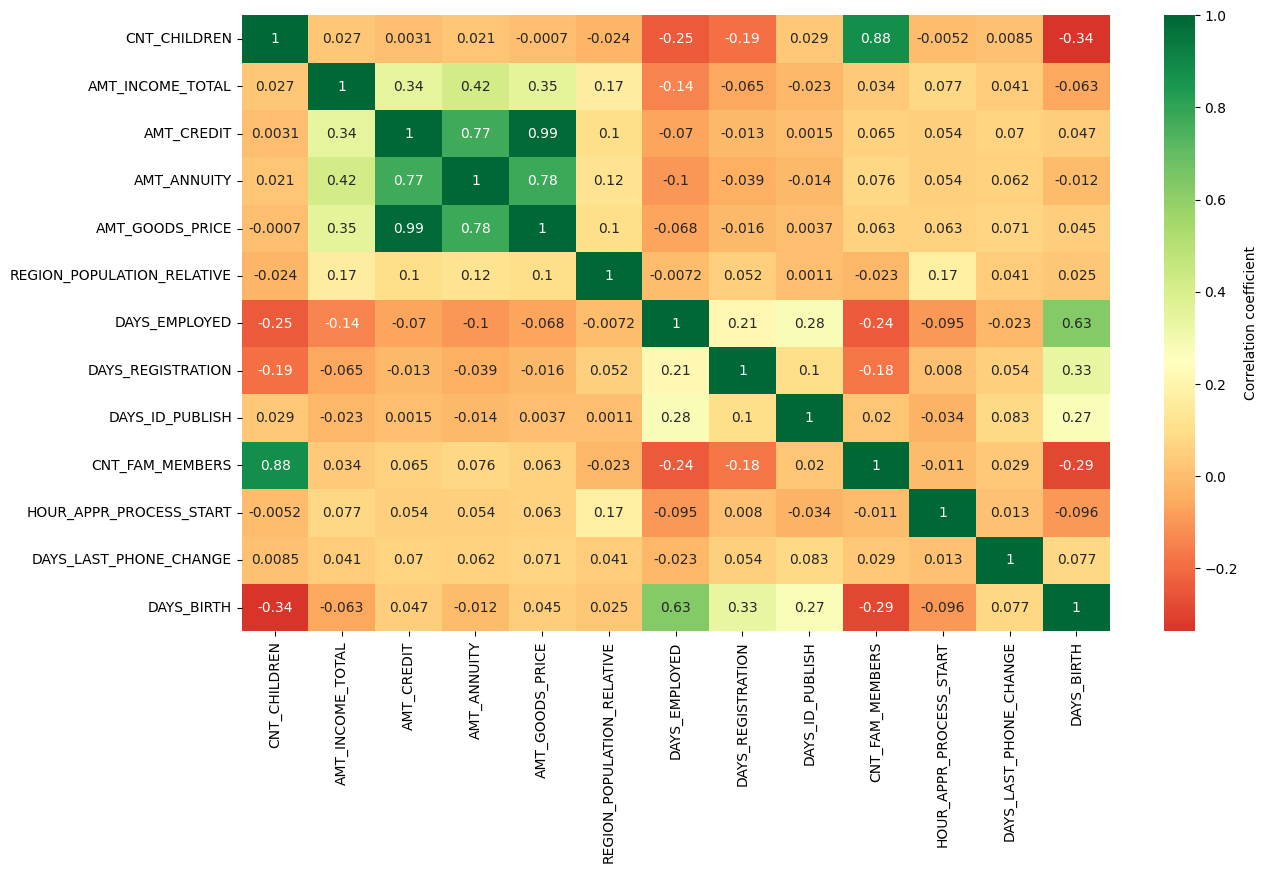

In [72]:
# Plotting the heatmap for all the columns of the apls1_repayers dataset
plt.figure(figsize=(14,8))
sns.heatmap(data=apls1_repayers.corr(), cmap='RdYlGn', center=0.25, annot=True, cbar_kws={'label': 'Correlation coefficient'})
plt.show()

#### Insights (Reds ends and Green ends have high correlation):-
- AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE are highly correlated to each other as AMT_CREDIT will be based on AMT_GOODS_PRICE and AMT_ANNUITY will be based on AMT_CREDIT
- CNT_CHILDREN & CNT_FAM_MEMBERS have good correlation (More the family members, more will be children in that family)

## 4. Previous Applications Data

### 4.1 Data Understanding

In [73]:
# Viewing the data
pre_apls.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


#### Data Shape

In [74]:
pre_apls.shape

(1670214, 37)

#### Data Information

In [75]:
# Checking the datatypes of all the columns
pre_apls.info() # All columns are in the correct format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

#### Continous Columns Information

In [76]:
pre_apls.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


### 4.2 Handling Missing Values & Data Sanity Check

#### Check for Missing Values

In [77]:
pre_apls.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

#### % of Missing Values in all the Columns

In [78]:
pre_apls.isna().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

#### Dropping Columns with Missing Values >40%

In [79]:
col_null_40_pre_apls=pre_apls.columns[pre_apls.isna().mean()*100>40]
pre_apls.drop(columns=col_null_40_pre_apls, inplace=True) #Dropped the columns that had the null values >40%

#### Dealing the Null Values of 'AMT_CREDIT' Column (0.00006 % Null values)

In [80]:
# Deleting the rows that has null values in the column 'AMT_CREDIT' (0.00006 % Null Values)
pre_apls=pre_apls[~pre_apls['AMT_CREDIT'].isna()]

#### Imputing the Null Values of the 'AMT_ANNUITY' Column (22.28% Null values)
- W.r.t the 'AMT_CREDIT' on average or median (here), applicants have Annual 10 installements
- Therefore replacing the null values of 'AMT_ANNUITY' by dividing 'AMT_CREDIT' with 10

In [81]:
annual_installments=int((pre_apls['AMT_CREDIT']/pre_apls['AMT_ANNUITY']).median())
pre_apls['AMT_ANNUITY'].fillna(pre_apls['AMT_CREDIT']/annual_installments, inplace=True)

#### Imputing the Null Values of 'AMT_GOODS_PRICE' column (23.08% Null values)
- As 'AMT_APPLICATION' will be based on 'AMT_GOODS_PRICE', filling the null values of 'AMT_GOODS_PRICE' with the values of 'AMT_APPLICATION' column

In [82]:
pre_apls['AMT_GOODS_PRICE']=pre_apls['AMT_GOODS_PRICE'].fillna(pre_apls['AMT_APPLICATION'])

#### Imputing the Null Values of 'CNT_PAYMENT' column (22.28% Null values)
- As 'CNT_PAYMENT' column is about the duration between the application and previous loan credit. If the previous loan status is 'Canceled' or 'Refused' or 'Unused offer', then 'CNT_PAYMENT' will be Zero.

In [83]:
#Checking for the Loan status from 'NAME_CONTRACT_STATUS' column at the null places of 'CNT_PAYMENT' column
pre_apls[pre_apls['CNT_PAYMENT'].isna()]['NAME_CONTRACT_STATUS'].value_counts() 

NAME_CONTRACT_STATUS
Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: count, dtype: int64

In [84]:
# As the 'NAME_CONTRACT_STATUS' are in ['Canceled', 'Refused', 'Unused offer']
# Replacing null values with 0
pre_apls['CNT_PAYMENT']=pre_apls['CNT_PAYMENT'].fillna(0)

#### Dealing with the Null Values of 'PRODUCT_COMBINATION' column (0.02% Null values)
- Dropping the rows that has null values in the column 'PRODUCT_COMBINATION'

In [85]:
pre_apls=pre_apls[~pre_apls['PRODUCT_COMBINATION'].isna()]

#### Final Check for the Null Values of all the Columns

In [86]:
pre_apls.isna().mean()*100

SK_ID_PREV                     0.0
SK_ID_CURR                     0.0
NAME_CONTRACT_TYPE             0.0
AMT_ANNUITY                    0.0
AMT_APPLICATION                0.0
AMT_CREDIT                     0.0
AMT_GOODS_PRICE                0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
NFLAG_LAST_APPL_IN_DAY         0.0
NAME_CASH_LOAN_PURPOSE         0.0
NAME_CONTRACT_STATUS           0.0
DAYS_DECISION                  0.0
NAME_PAYMENT_TYPE              0.0
CODE_REJECT_REASON             0.0
NAME_CLIENT_TYPE               0.0
NAME_GOODS_CATEGORY            0.0
NAME_PORTFOLIO                 0.0
NAME_PRODUCT_TYPE              0.0
CHANNEL_TYPE                   0.0
SELLERPLACE_AREA               0.0
NAME_SELLER_INDUSTRY           0.0
CNT_PAYMENT                    0.0
NAME_YIELD_GROUP               0.0
PRODUCT_COMBINATION            0.0
dtype: float64

#### Viewing the Data

In [87]:
pre_apls.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


### 4.3 Univariate & Multivariate Analysis
- Target:- 'NAME_CONTRACT_STATUS'

#### NAME_CONTRACT_TYPE

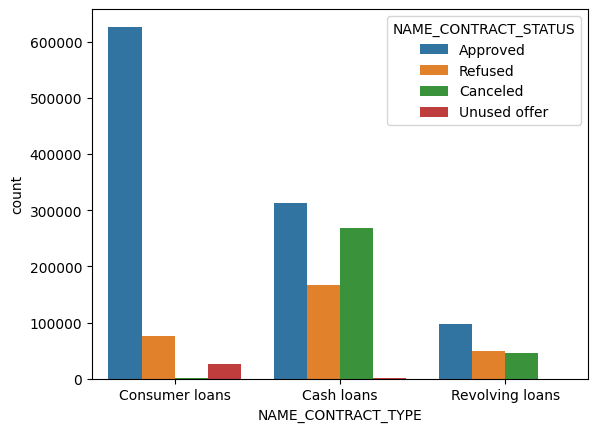

In [88]:
sns.countplot(data=pre_apls, x=pre_apls['NAME_CONTRACT_TYPE'], hue=pre_apls['NAME_CONTRACT_STATUS'])
plt.show()

#### Insights:-
- More clients are cancelling the loans themselves under cash loans category
- Consumer loans has the highest approval rate and lowest cancellations by the clients

#### AMT_CREDIT_G ('AMT_CREDIT' grouped)

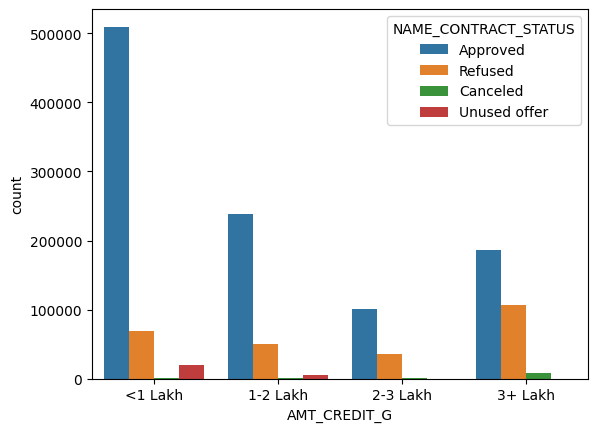

In [89]:
pre_apls['AMT_CREDIT_G']=pd.cut(pre_apls['AMT_CREDIT'], [0,100000,200000,300000,9999999999], labels=['<1 Lakh','1-2 Lakh', '2-3 Lakh', '3+ Lakh'])
sns.countplot(data=pre_apls, x=pre_apls['AMT_CREDIT_G'], hue=pre_apls['NAME_CONTRACT_STATUS'])
plt.show()

#### Insights:-
- High approval rate for credit amount less than 1 lakh
- Less approval rate for credit amount more than 3 lakh 

#### NAME_CASH_LOAN_PURPOSE

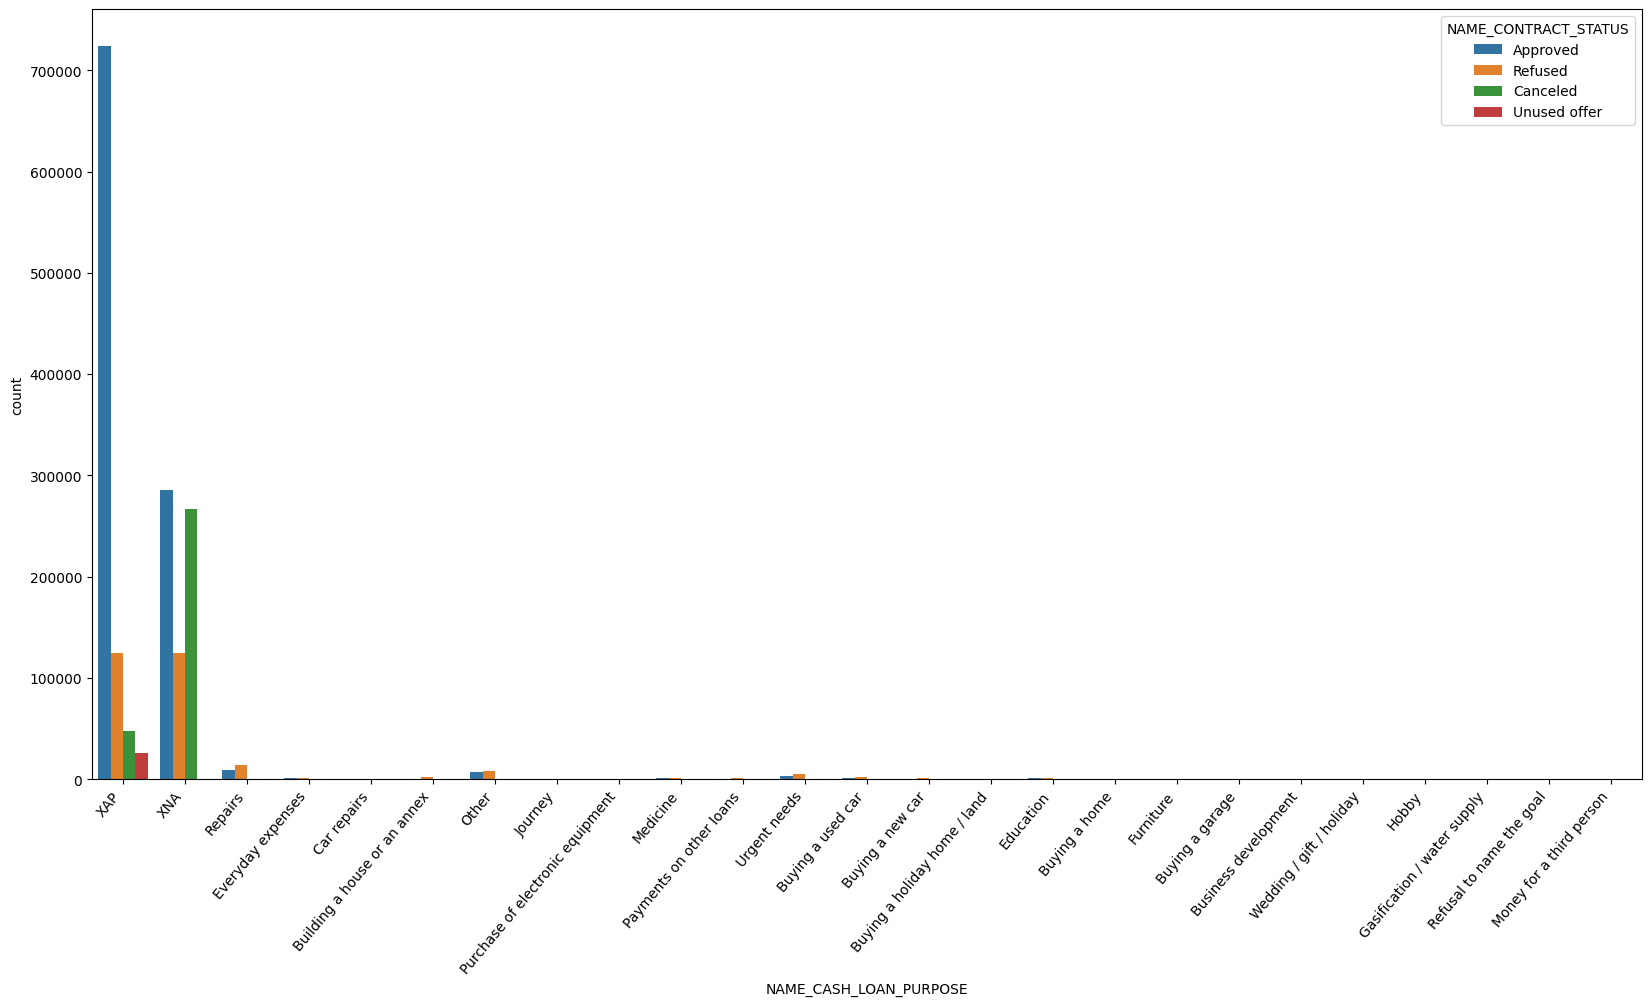

In [90]:
plt.figure(figsize=(20,10))
plot=sns.countplot(data=pre_apls, x=pre_apls['NAME_CASH_LOAN_PURPOSE'], hue=pre_apls['NAME_CONTRACT_STATUS'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=50, horizontalalignment='right')
plt.show()

#### Insights:-
- Since majority of the values are XAP & XNA, not much useful insight was seen from this plot

#### NAME_GOODS_CATEGORY

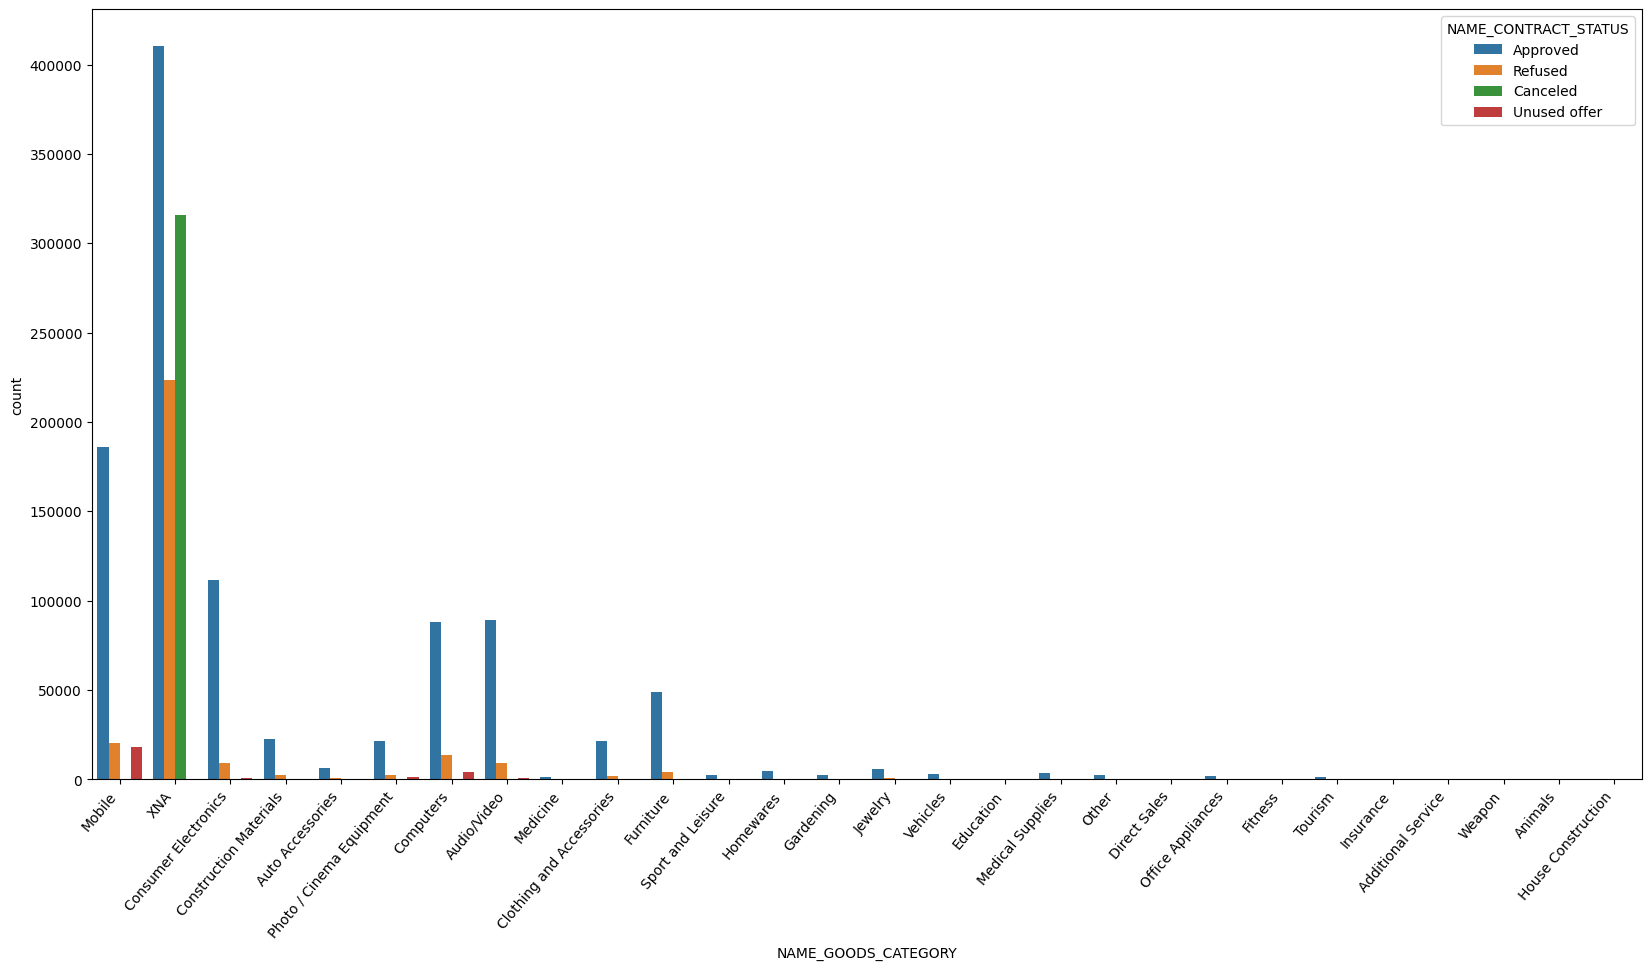

In [91]:
plt.figure(figsize=(20,10))
plot=sns.countplot(data=pre_apls, x=pre_apls['NAME_GOODS_CATEGORY'], hue=pre_apls['NAME_CONTRACT_STATUS'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=50, horizontalalignment='right')
plt.show()

#### Insights:-
- High approval rate can be expected for goods of mobile, consumer electronics, computers, clothing and furnitures, construction materials (Estimated based on the quantity of the data available)
- Again most of the data are XNA here

## 5. Merged Data
### 5.1 Data Merging

In [92]:
#Merging the dataframs 'apls' & 'pre_apls' data
merged_apls_preapls=apls.merge(pre_apls,how='inner',on='SK_ID_CURR')
merged_apls1_preapls=apls1.merge(pre_apls,how='inner',on='SK_ID_CURR')

#### Viewing the Data
- Target:- 'TARGET' column

In [93]:
merged_apls_preapls.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET_PERCENT,NO_CONTACT_INFO,CLIENT_REGION_RATING,PERCENTAGE_ADDRESS_MATCH,EXT_SOURCE,TOTAL_DOC_GIVEN,AGE,Repayer_or_Defaulter,DAYS_INFO_CHANGED,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,AMT_CREDIT_G
0,100002,1,Cash loans,Male,No,Yes,0,2L-3L,3L-6L,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-637,7-13yrs,2120,Laborers,<5,WEDNESDAY,10,Business Entity,2.0,2.0,2.0,2.0,2-4Yrs,0.0,0.0,0.0,0.0,0.0,1.0,100,4,2.0,100,0.201162,1,20-30,Defaulter,5-10Yrs,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,1-2 Lakh
1,100003,0,Cash loans,Female,No,No,0,2L-3L,9L+,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-1188,<7 yrs,291,Core staff,<5,MONDAY,11,School,1.0,0.0,1.0,0.0,2-4Yrs,0.0,0.0,0.0,0.0,0.0,0.0,0,4,1.0,100,0.578761,1,40-50,Repayer,<5Yrs,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,3+ Lakh
2,100003,0,Cash loans,Female,No,No,0,2L-3L,9L+,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-1188,<7 yrs,291,Core staff,<5,MONDAY,11,School,1.0,0.0,1.0,0.0,2-4Yrs,0.0,0.0,0.0,0.0,0.0,0.0,0,4,1.0,100,0.578761,1,40-50,Repayer,<5Yrs,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,3+ Lakh
3,100003,0,Cash loans,Female,No,No,0,2L-3L,9L+,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-1188,<7 yrs,291,Core staff,<5,MONDAY,11,School,1.0,0.0,1.0,0.0,2-4Yrs,0.0,0.0,0.0,0.0,0.0,0.0,0,4,1.0,100,0.578761,1,40-50,Repayer,<5Yrs,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,XAP,Approved,-2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,<1 Lakh
4,100004,0,Revolving loans,Male,Yes,Yes,0,<1L,<3L,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-225,7-13yrs,2531,Laborers,<5,MONDAY,9,Government,0.0,0.0,0.0,0.0,2-4Yrs,0.0,0.0,0.0,0.0,0.0,0.0,0,5,2.0,100,0.642739,0,50-60,Repayer,5-10Yrs,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,FRIDAY,5,Y,1,XAP,Approved,-815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest,<1 Lakh


#### Data Shape

In [94]:
merged_apls_preapls.shape

(1413387, 71)

#### Data Information

In [95]:
merged_apls_preapls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413387 entries, 0 to 1413386
Data columns (total 71 columns):
 #   Column                        Non-Null Count    Dtype   
---  ------                        --------------    -----   
 0   SK_ID_CURR                    1413387 non-null  int64   
 1   TARGET                        1413387 non-null  int64   
 2   NAME_CONTRACT_TYPE_x          1413387 non-null  object  
 3   CODE_GENDER                   1413387 non-null  object  
 4   FLAG_OWN_CAR                  1413387 non-null  object  
 5   FLAG_OWN_REALTY               1413387 non-null  object  
 6   CNT_CHILDREN                  1413387 non-null  int64   
 7   AMT_INCOME_TOTAL              1413387 non-null  category
 8   AMT_CREDIT_x                  1413387 non-null  category
 9   AMT_ANNUITY_x                 1413387 non-null  float64 
 10  AMT_GOODS_PRICE_x             1413387 non-null  float64 
 11  NAME_TYPE_SUITE               1413387 non-null  object  
 12  NAME_INCOME_TY

#### Continous Columns Information

In [96]:
merged_apls_preapls.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START_x,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET_PERCENT,NO_CONTACT_INFO,CLIENT_REGION_RATING,PERCENTAGE_ADDRESS_MATCH,EXT_SOURCE,TOTAL_DOC_GIVEN,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.413387e+06,1.413387e+06,1.413387e+06,1.413387e+06,1.413387e+06,1.413387e+06,1.413387e+06,1.413387e+06,1.413387e+06,1.413387e+06,1.413387e+06,1.413387e+06,1.413387e+06,1.413387e+06,1.413387e+06,1.413387e+06,1.413387e+06,1.413387e+06,1.413387e+06,1.413387e+06,1.413387e+06,1.413387e+06,1.413387e+06,1.413387e+06,1.413387e+06,1.413387e+06,1.413387e+06,1.413387e+06,1.413387e+06,1.413387e+06,1.413387e+06,1.413387e+06,1.413387e+06,1.413387e+06,1.413387e+06
mean,2.784831e+05,8.652690e-02,4.048658e-01,2.701742e+04,5.275041e+05,2.074983e-02,6.871228e+04,3.034642e+03,1.198430e+01,1.540691e+00,1.536946e-01,1.522858e+00,1.077900e-01,5.486112e-03,6.028073e-03,3.410319e-02,2.665045e-01,3.196973e-01,2.691238e+00,8.652690e+00,3.343186e+00,2.048623e+00,9.048900e+01,5.045176e-01,9.366034e-01,1.922745e+06,1.256738e+04,1.752825e+05,1.963976e+05,1.753076e+05,1.247888e+01,9.964313e-01,-8.804742e+02,3.150476e+02,1.256646e+01
std,1.028123e+05,2.811406e-01,7.173121e-01,1.395104e+04,3.532188e+05,1.334728e-02,1.452858e+05,1.507367e+03,3.232253e+00,2.528963e+00,4.654346e-01,2.507208e+00,3.786574e-01,7.703443e-02,1.002007e-01,2.012972e-01,9.269035e-01,8.781814e-01,2.157169e+00,2.811406e+01,8.802374e-01,4.854697e-01,1.771646e+01,1.371313e-01,2.979443e-01,5.327182e+05,1.452025e+04,2.936432e+05,3.195033e+05,2.936648e+05,3.331533e+00,5.963220e-02,7.835932e+02,7.695935e+03,1.448847e+01
min,1.000020e+05,0.000000e+00,0.000000e+00,1.615500e+03,4.050000e+04,2.900000e-04,-1.791200e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,2.686009e-04,0.000000e+00,1.000001e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00,0.000000e+00
25%,1.893640e+05,0.000000e+00,0.000000e+00,1.682100e+04,2.385000e+05,1.003200e-02,-2.828000e+03,1.783000e+03,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,3.000000e+00,2.000000e+00,1.000000e+02,4.137527e-01,1.000000e+00,1.461345e+06,3.102705e+03,1.975500e+04,2.491200e+04,1.975500e+04,1.000000e+01,1.000000e+00,-1.314000e+03,-1.000000e+00,0.000000e+00
50%,2.789970e+05,0.000000e+00,0.000000e+00,2.492550e+04,4.500000e+05,1.885000e-02,-1.281000e+03,3.330000e+03,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,3.000000e+00,2.000000e+00,1.000000e+02,5.202740e-01,1.000000e+00,1.922706e+06,8.448840e+03,7.090200e+04,8.064000e+04,7.091100e+04,1.200000e+01,1.000000e+00,-5.820000e+02,4.000000e+00,1.000000e+01
75%,3.675575e+05,0.000000e+00,1.000000e+00,3.454200e+04,6.795000e+05,2.866300e-02,-2.840000e+02,4.319000e+03,1.400000e+01,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,4.000000e+00,2.000000e+00,1.000000e+02,6.070178e-01,1.000000e+00,2.384020e+06,1.680984e+04,1.800000e+05,2.156400e+05,1.800000e+05,1.500000e+01,1.000000e+00,-2.710000e+02,8.500000e+01,1.800000e+01
max,4.562550e+05,1.000000e+00,1.900000e+01,2.250000e+05,4.050000e+06,7.250800e-02,3.652430e+05,7.19

### 5.2 Univariate & Multivariate Analysis

#### NAME_CONTRACT_STATUS
- Plotting the % of Defaulters in each Contract status type
- Plotting the counts of Repayers and Defaulters in each NAME_CONTRACT_STATUS type

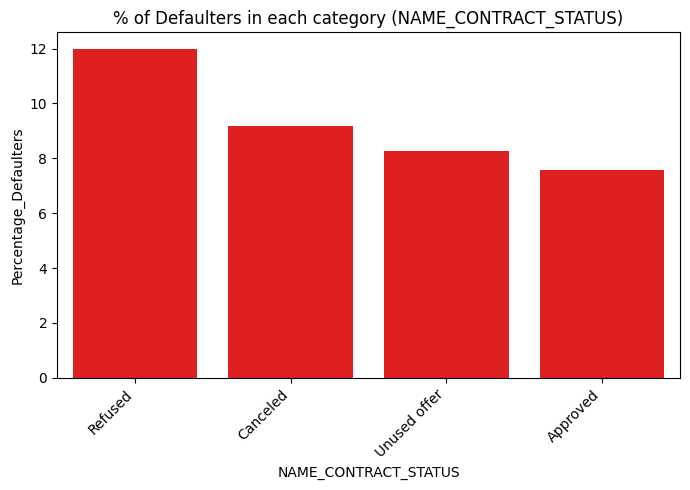

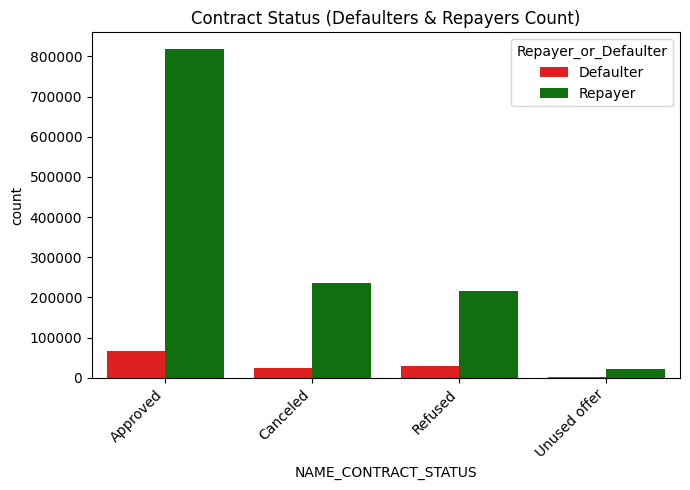

In [97]:
# Correct value counts with column name
chart1 = merged_apls_preapls['NAME_CONTRACT_STATUS'].value_counts().to_frame(name='Value_Counts')

# Get sum of defaulters by contract status
defaulters = merged_apls_preapls.groupby('NAME_CONTRACT_STATUS')['TARGET'].sum()

# Combine both into one chart
chart = pd.concat([chart1, defaulters], axis=1).rename(columns={'TARGET': 'Defaulters'})

# Calculate % of defaulters
chart['Percentage_Defaulters'] = (chart['Defaulters'] / chart['Value_Counts']) * 100

# Clean up for plotting
chart = chart.drop(columns=['Value_Counts', 'Defaulters'])
chart.index.name = 'NAME_CONTRACT_STATUS'
chart = chart.reset_index()
chart.sort_values('Percentage_Defaulters', ascending=False, inplace=True)

# Bar plot - % of Defaulters
plt.figure(figsize=(7, 5))
a = sns.barplot(data=chart, x='NAME_CONTRACT_STATUS', y='Percentage_Defaulters', color='Red')
a.set_xticklabels(a.get_xticklabels(), rotation=45, ha='right')
plt.title('% of Defaulters in each category (NAME_CONTRACT_STATUS)')
plt.tight_layout()
plt.show()

# Countplot - Raw counts of Defaulters/Repayers
plt.figure(figsize=(7, 5))
sns.countplot(data=merged_apls_preapls, x='NAME_CONTRACT_STATUS', hue='Repayer_or_Defaulter', palette=['Red', 'Green'])
plt.title('Contract Status (Defaulters & Repayers Count)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Insights:-
- Clients whose application had been rejected before have very high defaulting rate  (~12%)
- Clients who cancelled their application previously have moderate defaulting rate of ~9%
- Clients whose application had been approved before have less defaulting rate ~7.5%
- Seems like bank has rejected the right people before who have high defaulting rate

#### AMT_INCOME_TOTAL vs NAME_CONTRACT_STATUS (Target:- 'TARGET')

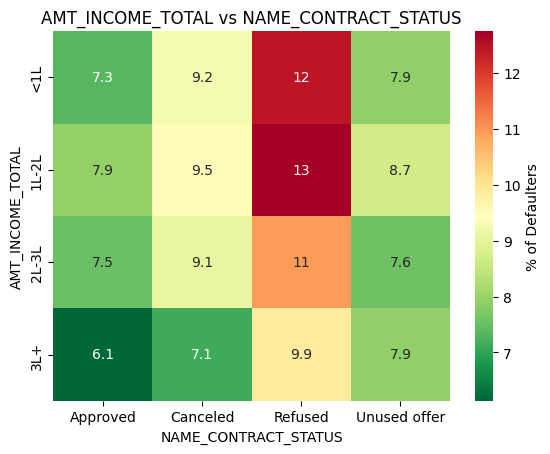

In [98]:
pivot=merged_apls_preapls.pivot_table(index='AMT_INCOME_TOTAL', columns='NAME_CONTRACT_STATUS', values='TARGET_PERCENT')
sns.heatmap(data=pivot, cmap='RdYlGn_r', annot=True, cbar_kws={'label':'% of Defaulters'})
plt.title('AMT_INCOME_TOTAL vs NAME_CONTRACT_STATUS')
plt.show()

#### Insights:-
- More defaulters have total income <1.75 Lakh who were rejected before
- Previously Rejected clients with income level less than 3 Lakh have high defaulting rate (>11%)
- Previously Approved clients with almost all income level have less defaulting rate (<7.5%)

#### AMT_CREDIT_y vs NAME_CONTRACT_STATUS (Target:- 'TARGET')

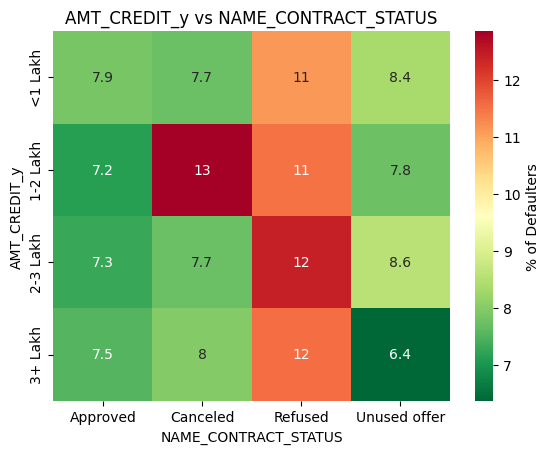

In [99]:
merged_apls_preapls['AMT_CREDIT_y']=pd.cut(merged_apls_preapls['AMT_CREDIT_y'], [0,100000,200000,300000,999999999], labels=['<1 Lakh', '1-2 Lakh','2-3 Lakh', '3+ Lakh'])
pivot=merged_apls_preapls.pivot_table(index='AMT_CREDIT_y', columns='NAME_CONTRACT_STATUS', values='TARGET_PERCENT')
sns.heatmap(data=pivot, cmap='RdYlGn_r', annot=True, cbar_kws={'label':'% of Defaulters'})
plt.title('AMT_CREDIT_y vs NAME_CONTRACT_STATUS')
plt.show()

#### Insights:- 
- Rejected clients with all types of credit amounts requested had high defaulting rates >11%
- Some or the other way bank has rejected the right clients before to prevent the defaulters >10%

#### NAME_CLIENT_TYPE vs NAME_CONTRACT_STATUS (Target:- 'TARGET')

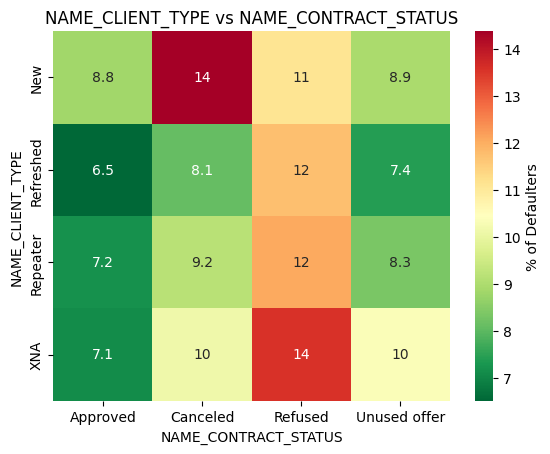

In [100]:
pivot=merged_apls_preapls.pivot_table(index='NAME_CLIENT_TYPE', columns='NAME_CONTRACT_STATUS', values='TARGET_PERCENT')
sns.heatmap(data=pivot, cmap='RdYlGn_r', annot=True, cbar_kws={'label':'% of Defaulters'})
plt.title('NAME_CLIENT_TYPE vs NAME_CONTRACT_STATUS')
plt.show()

#### Insights:- 
- New clients who cancelled themselves from loan previously have relatively high defaulting rates
- previously rejected clients have very high defaulting rates.
- Somewhere the bank has tried to prevent the risk by rejecting the right clients before to prevent the defaulters >11%

#### Analysis on Previously Approved clients

In [101]:
approved_clients=merged_apls_preapls[merged_apls_preapls['NAME_CONTRACT_STATUS']=='Approved']
approved_clients.shape

(886098, 71)

#### AMT_INCOME_TOTAL vs OCCUPATION_TYPE

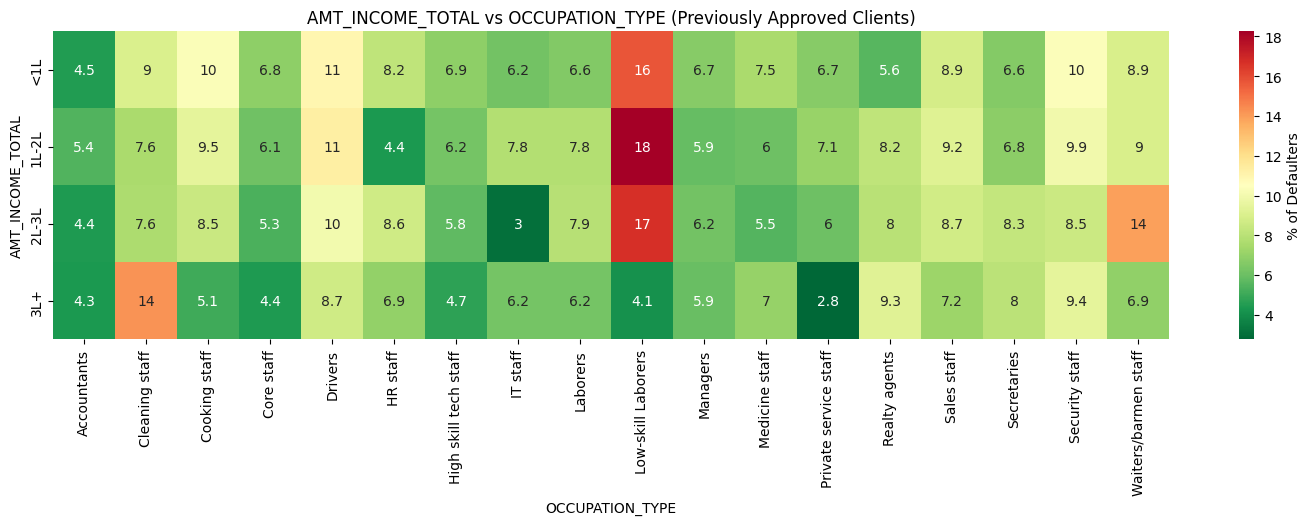

In [102]:
pivot=approved_clients.pivot_table(index='AMT_INCOME_TOTAL', columns='OCCUPATION_TYPE', values='TARGET_PERCENT')
plt.figure(figsize=(18,4))
sns.heatmap(data=pivot, cmap='RdYlGn_r', annot=True, cbar_kws={'label':'% of Defaulters'})
plt.title('AMT_INCOME_TOTAL vs OCCUPATION_TYPE (Previously Approved Clients)')
plt.show()

#### Insights:-
- In approved clients, low skill laborers with less salary (<2-3 Lakhs) have very high defaulting rates >16%
- Surprisingly, in approved clients, cleaning staffs with high salary (3+ Lakhs) have very high defaulting rates >14%
- In approved clients, waiters with high salary range 2-3 Lakhs have very high defaulting rates >14%
- Others are in the lower and acceptable range

## 6. Conclusion
### 6.1 Decessive Factors & Suggestions

#### Applications
- NAME_CONTRACT_TYPE:- More than 8% of the clients under cash loans are defaulters, whereas ~5% of the clients under revolving loans are defaulters.
- CODE_GENDER:- 10% of the male clients are defaulters and 7% of the female clients are defaulters.
- AGE:- More the age of the client (>50), the less the defaulting rate (`~6%). Clients under 40 have a high defaulting rate (>8%).
- CNT_CHILDREN:- Clients with children <=3 have fewer defaulters (<=10%). Less data is available for children more than 5.
- AMT_INCOME_TOTAL:- Clients with total income >3 Lakhs have less defaulting rate whereas Clients with total income <2 Lakhs have more defaulting rate.
- NAME_INCOME_TYPE:- Very high defaulters in the 'Maternity Leave' & 'Unemployed' categories. But the counts are very less. Pensioners and State Servants have less defaulting rate comparatively (Less risk with them).
- NAME_EDUCATION_TYPE:- Clients with lower secondary or secondary special have a high defaulting rate. Higher education and academic degree holders have less defaulting rates.
- NAME_FAMILY_STATUS:- Single and Civil married clients have more defaulting rates. Clients who are widowed have a less defaulting rate (Less risk).
- NAME_HOUSING_TYPE:- Clients living in Rented apartments or With parents have higher defaulting rate. Clients living in Office apartments or owning a House/apartment have less defaulting rate.
- OCCUPATION_TYPE:- Sales staff, Drivers, Security staff, Cooking staff, low-skill Laborers (Very high), and Waiters/barmen staffs have a high defaulting rates. Core staff, Managers, High skilled tech staff, Accountants, Medicines, Private service, Secretaries, HR & IT staff have less defaulting rate .
- ORGANIZATION_TYPE:- Very high risk (>10%) in Self-employed, Transport, Construction, Agriculture, Restaurants, Relator, and Cleaning organizations type. Less risk (<6%) associated with clients coming from Educational Universities, Medicine, Military, Bank, Police, Security Ministers, Insurance & Cultural organizations type.
- AMT_CREDIT:- Clients who have requested credit between 3-6 Lakhs have more defaulting rate (>9%). Clients who have requested credit of more than 9 lakhs have a less defaulting rate (<6%).
- PERCENTAGE_ADDRESS_MATCH:- Clients whose address match percent <50% have more defaulting rates. Clients whose address match percent is 100% have less defaulting rate (<8%).
- DAYS_INFO_CHANGED:- Clients who have changed their information recently (<4-5 years) have a high defaulting rate. Clients who have changed their information >8-12 years have a less defaulting rate.
- CNT_FAM_MEMBERS:- Clients having family members <=5 have a lesser defaulting rate.
- CLIENT_REGION_RATING:- Higher the rating of the client's region, more was the defaulting rate. Insights from this were actually inverse of the expected results.
- DAYS_LAST_PHONE_CHANGE:- More the years of the last phone changed, the lesser the defaulting rate. Clients who have changed their phone numbers within 2 years from the date of loan application have higher defaulting rates.
- NAME_CONTRACT_TYPE vs CODE_GENDER:- High defaulting rate under Male - Cash loans category (11%).
- CODE_GENDER vs AMT_INCOME_TOTAL:- Male clients with income <1 Lakh have high defaulting rate (11%).
- AMT_INCOME_TOTAL vs AMT_CREDIT:- Clients with less income and credit amount requestion higher than their income have high defaulting rate (10%).
- AMT_INCOME_TOTAL vs NAME_EDUCATION_TYPE:- Clients with Academic degrees and Higher education with all income levels have very less defaulting rates.
- AMT_INCOME_TOTAL vs AGE:- Young clients whose age is 20-40 with income level <2-3 Lakh have high defaulting rates. Older clients with all income levels have less defaulting rate.
- AMT_INCOME_TOTAL vs DAYS_INFO_CHANGED:- Clients with lower salaries and who have changed their documents in <5 years have a high defaulting rate.
- AMT_INCOME_TOTAL vs NAME_FAMILY_STATUS:- Widow clients with all types of income levels have less defaulting rate (4-6%).
- AMT_INCOME_TOTAL vs NAME_HOUSING_TYPE:- Clients with income <2 Lakhs who have either rented an apartment or with their parents have a very high defaulting rate (10-13%).
- AMT_INCOME_TOTAL vs OCCUPATION_TYPE:- Low-skill laborers, Waiters, Drivers, Cooking & Security staff with less income level (<3 Lakh) have a very high defaulting rate.
- AMT_INCOME_TOTAL vs ORGANIZATION_TYPE:- Retailor and Cleaning organization type with income level <2 Lakhs have a very high defaulting rate (14-19%).
- AMT_INCOME_TOTAL vs DAYS_LAST_PHONE_CHANGE:- Clients who have changed their phone number in <2-3 years have high defaulting rates.
- AMT_INCOME_TOTAL vs CLIENT_REGION_RATING:- Clients from regions rated with 3 (of all income levels) have high defaulting rates.
#### Previous Applications
- NAME_CONTRACT_TYPE:- More clients are canceling the loans themselves under the cash loans category.
- AMT_CREDIT_G ('AMT_CREDIT' grouped):- High approval was given for credit amount less than 1 lakh.
- NAME_GOODS_CATEGORY:- High approval rate can be expected for goods of mobile, consumer electronics, computers, clothing and furniture, and construction materials (Estimated based on the quantity of the data available).
#### Merged Data
- NAME_CONTRACT_STATUS:- Clients whose applications had been rejected before have a very high defaulting rate  (~12%). Seems like the bank has rejected the right people who have high defaulting rates.
- AMT_INCOME_TOTAL vs NAME_CONTRACT_STATUS:- Previously Rejected clients with income level less than 3 Lakh have a high defaulting rate (>11%).
- AMT_CREDIT_y vs NAME_CONTRACT_STATUS:- Rejected clients with all types of credit amounts requested had high defaulting rates >11%.
- NAME_CLIENT_TYPE vs NAME_CONTRACT_STATUS:- New clients who cancelled themselves from loan previously, have relatively high defaulting rates.
- AMT_INCOME_TOTAL vs OCCUPATION_TYPE (Approved Clients Data):- 
 - In approved clients, low skill laborers with less salary (<2-3 Lakhs) have very high defaulting rates >16%.
 - Surprisingly, in approved clients, cleaning staffs with high salary (3+ Lakhs) have very high defaulting rates >14%.
 - In approved clients, waiters with high salary range 2-3 Lakhs have very high defaulting rates >14%.


 